<center>
    <h1><b>Bài toán xếp lịch làm cho nhân viên sử dụng các phương pháp vét cạn, nhánh cận, tham lam và quy hoạch động </b></h1>
    <h2><b>Học phần: Thiết kế và đánh giá thuật toán</b></h2>
    <h3><b>Giảng viên: PGS.TS. Nguyễn Thị Hồng Minh</b></h3>
    <h3><b>ThS. Trần Bá Tuấn</b></h3>
    <h3><b>CN. Đặng Trung Du</b></h3>
</center>

---
**Sinh viên thực hiện:**
- Vũ Kim Gia Minh - 22000109
- Dương Đức Vương - 22000133
- Nguyễn Thị Hoàng Yến - 22000134
- Đỗ Quốc An - 22000067

## Import thư viện cần thiết, dữ liệu đầu vào

* Import những thư viện cần thiết

In [6]:
import pandas as pd
import time
from collections import defaultdict
import matplotlib.pyplot as plt
from typing import List, Tuple, Dict
import itertools
import numpy as np

* Tạo thư mục chứa data

In [ ]:
# # Mount Google Drive nếu chưa thực hiện
# from google.colab import drive
# drive.mount('/content/drive')

# # Tạo các thư mục nếu chưa có
# import os
# folders = [
#     '/content/drive/MyDrive/Project_DAA/Data/Tăng tổng số nhân viên',
#     '/content/drive/MyDrive/Project_DAA/Data/Tăng số ngày làm việc',
#     '/content/drive/MyDrive/Project_DAA/Data/Tăng số nhân viên làm việc trong 1 ngày'
# ]
# for folder in folders:
#     os.makedirs(folder, exist_ok=True)


Mounted at /content/drive


* Sinh data gốc

In [ ]:
# def generate_schedule(n, filename='schedule.xlsx', seed=None):
#     """
#     Sinh lịch ca và đánh giá năng lực cho n nhân viên, xuất ra Excel.

#     Tham số:
#     - n (int): số nhân viên (phải >= 9 để đủ điều kiện tối thiểu mỗi ngày).
#     - filename (str): tên file Excel đầu ra.
#     - seed (int, optional): hạt giống cho thuật toán random (để tái lập kết quả).

#     Output:
#     - File Excel với n hàng và 10 cột:
#         + 7 cột 'Mon'...'Sun': ca làm việc, có thể là: 'không đăng ký', 'sáng', 'chiều', 'tối',
#           hoặc kết hợp như 'sáng+chiều', 'sáng+tối', 'chiều+tối', 'sáng+chiều+tối'.
#         + 3 cột 'Rate_Morning', 'Rate_Afternoon', 'Rate_Evening': đánh giá (1–3).
#     """
#     if seed is not None:
#         np.random.seed(seed)

#     if n < 9:
#         raise ValueError("Số lượng nhân viên phải >= 9 để đảm bảo đủ nhân lực.")

#     days = ['Day 1', 'Day 2', 'Day 3', 'Day 4', 'Day 5', 'Day 6', 'Day 7']
#     min_counts = {'1': 3, '2': 4, '3': 2}
#     shifts = ['1', '2', '3']

#     data = {d: [] for d in days}
#     # Sinh ca cho từng ngày
#     for d in days:
#         # Đảm bảo mỗi ca có đủ số lượng tối thiểu
#         shift_assignments = {shift: [] for shift in shifts}

#         # Cho phép nhân viên đăng ký nhiều ca hoặc không đăng ký ca nào
#         employees_schedule = [[] for _ in range(n)]

#         # Trước tiên, đảm bảo có đủ số lượng tối thiểu cho mỗi ca
#         for shift, min_count in min_counts.items():
#             # Chọn ngẫu nhiên nhân viên để đảm bảo đủ số lượng tối thiểu
#             selected_employees = np.random.choice(range(n), size=min_count, replace=False)
#             for emp in selected_employees:
#                 employees_schedule[emp].append(shift)
#                 shift_assignments[shift].append(emp)

#         # Còn lại, nhân viên có thể đăng ký thêm ca
#         for emp in range(n):
#             # 40% cơ hội đăng ký thêm ca (nếu chưa đăng ký đủ 3 ca)
#             while len(employees_schedule[emp]) < 3 and np.random.random() < 0.4:
#                 available_shifts = [s for s in shifts if s not in employees_schedule[emp]]
#                 if available_shifts:
#                     new_shift = np.random.choice(available_shifts)
#                     employees_schedule[emp].append(new_shift)
#                     shift_assignments[new_shift].append(emp)
#                 else:
#                     break

#         # Chuyển danh sách ca thành chuỗi hoặc 'không đăng ký'
#         day_schedule = []
#         for emp_shifts in employees_schedule:
#             if not emp_shifts:
#                 day_schedule.append('0')
#             else:
#                 # Sắp xếp theo thứ tự sáng-chiều-tối
#                 emp_shifts.sort(key=lambda x: shifts.index(x))
#                 day_schedule.append(''.join(emp_shifts))

#         data[d] = day_schedule

#     # Sinh đánh giá năng lực cho 3 ca
#     data['Rate_Morning']   = np.random.randint(1, 4, size=n)
#     data['Rate_Afternoon'] = np.random.randint(1, 4, size=n)
#     data['Rate_Evening']   = np.random.randint(1, 4, size=n)

#     # Tạo DataFrame và xuất CSV
#     df = pd.DataFrame(data)

#     # Kiểm tra số lượng tối thiểu của mỗi ca cho mỗi ngày
#     for day in days:
#         for shift in shifts:
#             shift_count = sum(1 for schedule in df[day] if shift in schedule)
#             if shift_count < min_counts[shift]:
#                 print(f"Cảnh báo: Ngày {day} có {shift_count} ca {shift}, ít hơn yêu cầu tối thiểu {min_counts[shift]}")

#     df.to_excel(filename, index=False, engine='openpyxl')
#     print(f"Đã sinh xong lịch cho {n} nhân viên và lưu vào '{filename}'.")


# if __name__ == "__main__":
#     # Ví dụ: sinh 15 nhân viên, lưu vào 'nhanvien_schedule.xlsx'
#     generate_schedule(n=15, filename='nhanvien_schedule.xlsx', seed=42)



Đã sinh xong lịch cho 15 nhân viên và lưu vào 'nhanvien_schedule.xlsx'.


* Sinh các bộ data với các kiểu tăng cỡ mẫu khác nhau

In [ ]:
# import numpy as np
# import pandas as pd
# import time
# import matplotlib.pyplot as plt

# # Hàm sinh lịch với tham số động: số nhân viên, số ca, ngày và yêu cầu tối thiểu
# def generate_schedule(n, k, days, min_counts):
#     """
#     Sinh lịch ca và đánh giá năng lực cho n nhân viên với k ca/ngày, d ngày.

#     Tham số:
#     - n (int): số nhân viên
#     - k (int): số ca/ngày
#     - days (list[str]): tên các ngày (ví dụ ['Mon','Tue',...])
#     - min_counts (dict[int, int]): số lượng tối thiểu cho mỗi ca (key: ca từ 1..k)

#     Trả về DataFrame với lịch và đánh giá năng lực.
#     """

#     if n < sum(min_counts.values()):
#         raise ValueError("Số nhân viên phải >= tổng yêu cầu tối thiểu các ca.")

#     shifts = list(range(1, k+1))
#     data = {d: [] for d in days}

#     # Sinh ca cho từng ngày
#     for d in days:
#         allocations = {s: [] for s in shifts}
#         schedules = [[] for _ in range(n)]
#         # Đảm bảo tối thiểu mỗi ca
#         for s, m in min_counts.items():
#             chosen = np.random.choice(n, size=m, replace=False)
#             for emp in chosen:
#                 schedules[emp].append(s)
#                 allocations[s].append(emp)
#         # Cho phép đăng ký thêm ca
#         for emp in range(n):
#             while len(schedules[emp]) < k and np.random.rand() < 0.4:
#                 avail = [s for s in shifts if s not in schedules[emp]]
#                 if not avail:
#                     break
#                 s2 = np.random.choice(avail)
#                 schedules[emp].append(s2)
#                 allocations[s2].append(emp)
#         # Chuyển sang chuỗi định dạng
#         day_str = [
#             ''.join(str(s) for s in sorted(emp_sched)) if emp_sched else '0'
#             for emp_sched in schedules
#         ]
#         data[d] = day_str

#     # Đánh giá năng lực cho mỗi ca
#     for s in shifts:
#         data[f'Rate_Ca{s}'] = np.random.randint(1, 4, size=n)

#     df = pd.DataFrame(data)
#     return df

# # Định nghĩa danh sách 5 bộ tham số, bao gồm tên file đầu ra
# # Tăng tổng số nhân viên
# param_list = [
#     {'n': 15, 'k': 3, 'days': ['Day 1','Day 2','Day 3','Day 4','Day 5','Day 6','Day 7'], 'min_counts': {1:3,2:4,3:2}, 'seed': 42, 'filename': 'schedule_15.xlsx'},
#     {'n': 20, 'k': 3, 'days': ['Day 1','Day 2','Day 3','Day 4','Day 5','Day 6','Day 7'], 'min_counts': {1:3,2:4,3:2}, 'seed': 30, 'filename': 'schedule_20.xlsx'},
#     {'n': 25, 'k': 3, 'days': ['Day 1','Day 2','Day 3','Day 4','Day 5','Day 6','Day 7'], 'min_counts': {1:3,2:4,3:2}, 'seed': 7, 'filename': 'schedule_25.xlsx'},
#     {'n': 30, 'k': 3, 'days': ['Day 1','Day 2','Day 3','Day 4','Day 5','Day 6','Day 7'], 'min_counts': {1:3,2:4,3:2}, 'seed': 21, 'filename': 'schedule_30.xlsx'},
#     {'n': 35, 'k': 3, 'days': ['Day 1','Day 2','Day 3','Day 4','Day 5','Day 6','Day 7'], 'min_counts': {1:3,2:4,3:2}, 'seed': 99, 'filename': 'schedule_35.xlsx'}
# ]

# # Tăng số ngày làm việc
# param_list2 = [
#     {'n': 15, 'k': 3, 'days': ['Day 1','Day 2','Day 3','Day 4','Day 5','Day 6','Day 7'], 'min_counts': {1:3,2:4,3:2}, 'seed': 42, 'filename': 'schedule_7day.xlsx'},
#     {'n': 15, 'k': 3, 'days': ['Day 1','Day 2','Day 3','Day 4','Day 5','Day 6','Day 7','Day 8','Day 9','Day 10','Day 11','Day 12','Day 13','Day 14'], 'min_counts': {1:3,2:4,3:2}, 'seed': 30, 'filename': 'schedule_14day.xlsx'},
#     {'n': 15, 'k': 3, 'days': ['Day 1','Day 2','Day 3','Day 4','Day 5','Day 6','Day 7','Day 8','Day 9','Day 10','Day 11','Day 12','Day 13','Day 14','Day 15','Day 16','Day 17','Day 18','Day 19','Day 20','Day 21'], 'min_counts': {1:3,2:4,3:2}, 'seed': 7, 'filename': 'schedule_21day.xlsx'},
#     {'n': 15, 'k': 3, 'days': ['Day 1','Day 2','Day 3','Day 4','Day 5','Day 6','Day 7','Day 8','Day 9','Day 10','Day 11','Day 12','Day 13','Day 14','Day 15','Day 16','Day 17','Day 18','Day 19','Day 20','Day 21','Day 22','Day 23','Day 24','Day 25','Day 26','Day 27','Day 28'], 'min_counts': {1:3,2:4,3:2}, 'seed': 21, 'filename': 'schedule_28day.xlsx'},
#     {'n': 15, 'k': 3, 'days': ['Day 1','Day 2','Day 3','Day 4','Day 5','Day 6','Day 7','Day 8','Day 9','Day 10','Day 11','Day 12','Day 13','Day 14','Day 15','Day 16','Day 17','Day 18','Day 19','Day 20','Day 21','Day 22','Day 23','Day 24','Day 25','Day 26','Day 27','Day 28','Day 29','Day 30','Day 31'], 'min_counts': {1:3,2:4,3:2}, 'seed': 99, 'filename': 'schedule_31day.xlsx'}
# ]

# # Tăng số nhân viên làm việc trong 1 ngày (đồng thời tăng tổng số nhân viên)
# param_list3 = [
#     {'n': 15, 'k': 3, 'days': ['Day 1','Day 2','Day 3','Day 4','Day 5','Day 6','Day 7'], 'min_counts': {1:3,2:4,3:2}, 'seed': 42, 'filename': 'employeesday_9.xlsx'},
#     {'n': 20, 'k': 3, 'days': ['Day 1','Day 2','Day 3','Day 4','Day 5','Day 6','Day 7'], 'min_counts': {1:6,2:8,3:4}, 'seed': 30, 'filename': 'employeesday_18.xlsx'},
#     {'n': 32, 'k': 3, 'days': ['Day 1','Day 2','Day 3','Day 4','Day 5','Day 6','Day 7'], 'min_counts': {1:9,2:12,3:6}, 'seed': 7, 'filename': 'employeesday_27.xlsx'},
#     {'n': 40, 'k': 3, 'days': ['Day 1','Day 2','Day 3','Day 4','Day 5','Day 6','Day 7'], 'min_counts': {1:12,2:16,3:8}, 'seed': 21, 'filename': 'employeesday_36.xlsx'},
#     {'n': 55, 'k': 3, 'days': ['Day 1','Day 2','Day 3','Day 4','Day 5','Day 6','Day 7'], 'min_counts': {1:15,2:20,3:10}, 'seed': 99, 'filename': 'employeesday_45.xlsx'}
# ]

# # Tạo và lưu 5 file Excel
# for params in param_list:
#     np.random.seed(params['seed'])  # để kết quả nhất quán
#     df = generate_schedule(params['n'], params['k'], params['days'], params['min_counts'])

#     # Ghi nhiều sheet
#     with pd.ExcelWriter(params['filename'], engine='openpyxl') as writer:
#       for i in range(1, 6):
#         np.random.seed(params['seed'] + i)  # tạo khác biệt
#         df_i = generate_schedule(params['n'], params['k'], params['days'], params['min_counts'])
#         df_i.to_excel(writer, sheet_name=f'Sheet{i}', index=False)
#     # Copy file vào thư mục trong Drive
#     !cp '{params["filename"]}' '/content/drive/MyDrive/Project_DAA/Data/Tăng tổng số nhân viên'

#     print(f"Đã tạo file '{params['filename']}' với 5 sheet và lưu vào Google Drive.")
# for params in param_list2:
#     np.random.seed(params['seed'])  # để kết quả nhất quán
#     df = generate_schedule(params['n'], params['k'], params['days'], params['min_counts'])

#     # Ghi nhiều sheet
#     with pd.ExcelWriter(params['filename'], engine='openpyxl') as writer:
#       for i in range(1, 6):
#         np.random.seed(params['seed'] + i)  # tạo khác biệt
#         df_i = generate_schedule(params['n'], params['k'], params['days'], params['min_counts'])
#         df_i.to_excel(writer, sheet_name=f'Sheet{i}', index=False)
#     # Copy file vào thư mục trong Drive
#     !cp '{params["filename"]}' '/content/drive/MyDrive/Project_DAA/Data/Tăng số ngày làm việc'

#     print(f"Đã tạo file '{params['filename']}' với 5 sheet và lưu vào Google Drive.")

# for params in param_list3:
#     np.random.seed(params['seed'])  # đảm bảo kết quả nhất quán
#     df = generate_schedule(params['n'], params['k'], params['days'], params['min_counts'])

#     # Ghi nhiều sheet
#     with pd.ExcelWriter(params['filename'], engine='openpyxl') as writer:
#         for i in range(1, 6):
#             np.random.seed(params['seed'] + i)  # tạo khác biệt cho mỗi sheet
#             df_i = generate_schedule(params['n'], params['k'], params['days'], params['min_counts'])
#             df_i.to_excel(writer, sheet_name=f'Sheet{i}', index=False)

#     # Copy file vào thư mục tương ứng trên Google Drive
#     !cp '{params["filename"]}' '/content/drive/MyDrive/Project_DAA/Data/Tăng số nhân viên làm việc trong 1 ngày'

#     print(f"Đã tạo file '{params['filename']}' với 5 sheet và lưu vào Google Drive.")

cp: cannot create regular file '/content/drive/MyDrive/Project_DAA/Data/Tăng tổng số nhân viên': No such file or directory
Đã tạo file 'schedule_15.xlsx' với 5 sheet và lưu vào Google Drive.
cp: cannot create regular file '/content/drive/MyDrive/Project_DAA/Data/Tăng tổng số nhân viên': No such file or directory
Đã tạo file 'schedule_20.xlsx' với 5 sheet và lưu vào Google Drive.
cp: cannot create regular file '/content/drive/MyDrive/Project_DAA/Data/Tăng tổng số nhân viên': No such file or directory
Đã tạo file 'schedule_25.xlsx' với 5 sheet và lưu vào Google Drive.
cp: cannot create regular file '/content/drive/MyDrive/Project_DAA/Data/Tăng tổng số nhân viên': No such file or directory
Đã tạo file 'schedule_30.xlsx' với 5 sheet và lưu vào Google Drive.
cp: cannot create regular file '/content/drive/MyDrive/Project_DAA/Data/Tăng tổng số nhân viên': No such file or directory
Đã tạo file 'schedule_35.xlsx' với 5 sheet và lưu vào Google Drive.
cp: cannot create regular file '/content/driv

* File path

In [13]:
data_d = [
    'data/Dữ liệu tăng số ngày làm việc/schedule_7day.xlsx',
    'data/Dữ liệu tăng số ngày làm việc/schedule_14day.xlsx',
    'data/Dữ liệu tăng số ngày làm việc/schedule_21day.xlsx',
    'data/Dữ liệu tăng số ngày làm việc/schedule_28day.xlsx',
    'data/Dữ liệu tăng số ngày làm việc/schedule_31day.xlsx'
]
data_n =[
    'data/Dữ liệu tăng tổng số nhân viên/schedule_15.xlsx',
    'data/Dữ liệu tăng tổng số nhân viên/schedule_20.xlsx',
    'data/Dữ liệu tăng tổng số nhân viên/schedule_25.xlsx',
    'data/Dữ liệu tăng tổng số nhân viên/schedule_30.xlsx',
    'data/Dữ liệu tăng tổng số nhân viên/schedule_35.xlsx'
]
data_k = [
    'data/Dữ liệu tăng số nhân viên làm việc trong 1 ngày/employeesday_9.xlsx',
    'data/Dữ liệu tăng số nhân viên làm việc trong 1 ngày/employeesday_18.xlsx',
    'data/Dữ liệu tăng số nhân viên làm việc trong 1 ngày/employeesday_27.xlsx',
    'data/Dữ liệu tăng số nhân viên làm việc trong 1 ngày/employeesday_36.xlsx',
    'data/Dữ liệu tăng số nhân viên làm việc trong 1 ngày/employeesday_45.xlsx'
]

Xếp lịch nhân viên thỏa mãn:

* Cần 3 ca sáng, 4 ca chiều, 2 ca tối

* Tối ưu tổng điểm theo đánh giá năng lực.

* Ưu tiên ít ca hơn nếu điểm bằng nhau.

* Tránh ca rời (sáng + tối).

## Brute Force

In [ ]:
from itertools import combinations
import pandas as pd
import numpy as np
import time
df = pd.read_excel('data/nhanvien_schedule.xlsx')
# Danh sách đường dẫn
# Hàm xử lý lịch
def is_valid_combo(combo, shift_num, day, df):
    for idx in combo:
        if str(shift_num) not in str(df.loc[idx, day]):
            return False
    return True

def get_total_rating(combo, shift_column_name, df):
    return sum(df.loc[i, shift_column_name] for i in combo)

def best_schedule_for_day(df, day):
    best_score = -1
    best_assignment = None
    required_morning = 3
    required_afternoon = 4
    required_evening = 2

    # ✅ Lọc trước nhân viên hợp lệ cho từng ca
    valid_morning = [i for i in range(len(df)) if '1' in str(df.loc[i, day])]
    valid_afternoon = [i for i in range(len(df)) if '2' in str(df.loc[i, day])]
    valid_evening = [i for i in range(len(df)) if '3' in str(df.loc[i, day])]

    # ✅ Vét cạn tổ hợp, loại trừ sớm nhân viên đã phân
    for morning in combinations(valid_morning, required_morning):
        remaining_afternoon = set(valid_afternoon)
        if len(remaining_afternoon) < required_afternoon:
            continue

        for afternoon in combinations(remaining_afternoon, required_afternoon):
            remaining_evening = set(valid_evening)
            if len(remaining_evening) < required_evening:
                continue

            for evening in combinations(remaining_evening, required_evening):
                score = (
                    sum(df.loc[i, 'Rate_Morning'] for i in morning) +
                    sum(df.loc[i, 'Rate_Afternoon'] for i in afternoon) +
                    sum(df.loc[i, 'Rate_Evening'] for i in evening)
                )

                if score > best_score:
                    best_score = score
                    best_assignment = {
                        'Morning (Ca 1)': morning,
                        'Afternoon (Ca 2)': afternoon,
                        'Evening (Ca 3)': evening
                    }

    return best_score, best_assignment
import time

def print_schedule_for_day(df):
    day_columns = df.columns[:-3]

    for day in day_columns:
        score, assignment = best_schedule_for_day(df, day)
        print(f"\n🗓️ {day}")
        if assignment:
            print(f"✅ Total rating: {score}")
            for shift, staff in assignment.items():
                staff_list = ", ".join(f"Staff {idx}" for idx in staff)
                print(f"  {shift}: {staff_list}")
        else:
            print("❌ No valid schedule found.")
def score(df):
  scores_per_day = []  # Danh sách lưu kết quả theo ngày
  day_columns = df.columns[:-3]  # Bỏ 3 cột cuối (Rate_Morning, Rate_Afternoon, Rate_Evening)

  for day in day_columns:
        score, _ = best_schedule_for_day(df, day)
        scores_per_day.append((day, score))

  return scores_per_day
# ⏱️ Đo tổng thời gian toàn bộ
start_time = time.time()
print_schedule_for_day(df)
times = time.time() - start_time
print(f"\n⏱️ Total time: {times:.2f} seconds")
score = score(df)
scores_int = [(day, int(score)) for day, score in score]
print(f"Tổng điểm: {scores_int}")


🗓️ Day 1
✅ Total rating: 17
  Morning (Ca 1): Staff 0, Staff 4, Staff 9
  Afternoon (Ca 2): Staff 0, Staff 8, Staff 10, Staff 12
  Evening (Ca 3): Staff 8, Staff 12

🗓️ Day 2
✅ Total rating: 22
  Morning (Ca 1): Staff 0, Staff 5, Staff 9
  Afternoon (Ca 2): Staff 0, Staff 1, Staff 4, Staff 6
  Evening (Ca 3): Staff 3, Staff 11

🗓️ Day 3
✅ Total rating: 23
  Morning (Ca 1): Staff 0, Staff 7, Staff 9
  Afternoon (Ca 2): Staff 0, Staff 1, Staff 2, Staff 4
  Evening (Ca 3): Staff 7, Staff 12

🗓️ Day 4
✅ Total rating: 21
  Morning (Ca 1): Staff 2, Staff 7, Staff 9
  Afternoon (Ca 2): Staff 4, Staff 5, Staff 8, Staff 11
  Evening (Ca 3): Staff 11, Staff 10

🗓️ Day 5
✅ Total rating: 20
  Morning (Ca 1): Staff 1, Staff 7, Staff 12
  Afternoon (Ca 2): Staff 0, Staff 1, Staff 3, Staff 6
  Evening (Ca 3): Staff 12, Staff 7

🗓️ Day 6
✅ Total rating: 18
  Morning (Ca 1): Staff 3, Staff 4, Staff 5
  Afternoon (Ca 2): Staff 0, Staff 1, Staff 5, Staff 11
  Evening (Ca 3): Staff 3, Staff 12

🗓️ Day 7


## Branch and Bound


### Hàm xếp lịch tối ưu

In [ ]:
import pandas as pd
import numpy as np
import os
import time
import heapq
import matplotlib.pyplot as plt
from glob import glob

def optimize_schedule15():
    """Tối ưu hóa lịch trình cho file schedule15.xlsx với ràng buộc availability."""
    filename = 'data/nhanvien_schedule.xlsx'

    if not os.path.exists(filename):
        print(f"❌ Không tìm thấy file: {filename}")
        return

    try:
        # Tải dữ liệu
        df = pd.read_excel(filename)

        # Lấy số nhân viên từ DataFrame
        n_employees = len(df)

        # Định nghĩa các ngày trong tuần
        day_columns = ['Day 1', 'Day 2', 'Day 3', 'Day 4', 'Day 5', 'Day 6', 'Day 7']
        available_days = [day for day in day_columns if day in df.columns]

        if not available_days:
            print(f"❌ Không tìm thấy cột ngày nào trong file")
            return

        # Trích xuất thông tin liên quan
        shifts = ['1', '2', '3']  # Sáng, Chiều, Tối
        min_staff = {'1': 3, '2': 4, '3': 2}  # YÊU CẦU NGHIÊM NGẶT

        # Trích xuất đánh giá
        ratings = {}
        try:
            if 'Rate_Ca1' in df.columns:
                ratings['1'] = df['Rate_Ca1'].values
                ratings['2'] = df['Rate_Ca2'].values
                ratings['3'] = df['Rate_Ca3'].values
            else:
                ratings['1'] = df['Rate_Morning'].values
                ratings['2'] = df['Rate_Afternoon'].values
                ratings['3'] = df['Rate_Evening'].values
        except KeyError as e:
            print(f"❌ Lỗi: Không tìm thấy cột đánh giá {e}")
            return

        # Trích xuất availability cho từng ngày
        for day in available_days:
            day_data = df[day].values

            # Tạo availability matrix từ dữ liệu ngày
            availability = {'1': np.zeros(n_employees, dtype=int),
                          '2': np.zeros(n_employees, dtype=int),
                          '3': np.zeros(n_employees, dtype=int)}

            for emp in range(n_employees):
                shifts_available = str(day_data[emp]) if pd.notna(day_data[emp]) else ""
                if '1' in shifts_available: availability['1'][emp] = 1
                if '2' in shifts_available: availability['2'][emp] = 1
                if '3' in shifts_available: availability['3'][emp] = 1

            # Tối ưu hóa với ràng buộc availability
            result = branch_and_bound_day_with_constraints(ratings, min_staff, shifts, n_employees, availability)

            if result is None:
                print(f"❌ Không thể tối ưu hóa {day}")
            else:
                print_schedule_for_day(day, result['schedule'], ratings, shifts, n_employees)
                print()  # Dòng trống giữa các ngày

    except Exception as e:
        print(f"❌ Lỗi khi xử lý {filename}: {e}")

def evaluate_day_schedule(schedule, ratings, shifts):
    """Tính tổng giá trị đánh giá cho lịch trình trong ngày."""
    total_rating = 0
    for shift in shifts:
        emp_indices = np.where(schedule[shift] == 1)[0]
        for emp in emp_indices:
            total_rating += ratings[shift][emp]
    return total_rating

def is_valid_day_schedule(schedule, min_staff, shifts, availability):
    """Kiểm tra xem lịch trình trong ngày có hợp lệ không - NGHIÊM NGẶT."""
    # Kiểm tra CHÍNH XÁC số lượng nhân viên cho mỗi ca
    for shift in shifts:
        count = np.sum(schedule[shift])
        if count != min_staff[shift]:
            return False

    # Kiểm tra ràng buộc không chia ca (không có sáng và tối mà không có chiều)
    for emp in range(len(schedule[shifts[0]])):
        if schedule['1'][emp] == 1 and schedule['3'][emp] == 1 and schedule['2'][emp] == 0:
            return False

        # Kiểm tra nhân viên chỉ được gán vào ca đã đăng ký
        for shift in shifts:
            if schedule[shift][emp] == 1 and availability[shift][emp] == 0:
                return False

    return True

def calculate_heuristic_with_balance(node, ratings, min_staff, shifts, n_employees, availability, current_workload):
    """Heuristic function kết hợp giá trị hiện tại, tiềm năng và cân bằng workload."""
    current_value = evaluate_day_schedule(node['schedule'], ratings, shifts)

    # Tính tiềm năng từ các quyết định còn lại
    potential = 0
    for shift in shifts:
        assigned = np.sum(node['schedule'][shift])
        needed = max(0, min_staff[shift] - assigned)

        # Lấy top ratings cho ca này từ nhân viên chưa được gán và có thể làm ca này
        remaining_options = []
        for i in range(node['level'], len(node['decisions'])):
            s, emp = node['decisions'][i]
            if s == shift and availability[shift][emp] == 1:
                # Thêm bonus cho nhân viên có ít ca hơn
                workload_bonus = max(0, 3 - current_workload[emp]) * 0.1
                remaining_options.append(ratings[shift][emp] + workload_bonus)

        if remaining_options and needed > 0:
            remaining_options.sort(reverse=True)
            potential += sum(remaining_options[:needed])

    return current_value + potential * 0.8

def can_assign_employee_to_shift(node, shift, emp, min_staff, availability):
    """Kiểm tra xem có thể gán nhân viên vào ca hay không."""
    current_schedule = node['schedule']

    # Kiểm tra nếu nhân viên không đăng ký ca này
    if availability[shift][emp] == 0:
        return False

    # Kiểm tra nếu ca đã đủ người
    current_count = np.sum(current_schedule[shift])
    if current_count >= min_staff[shift]:
        return False

    # Kiểm tra ràng buộc không chia ca
    if shift == '1' and current_schedule['3'][emp] == 1 and current_schedule['2'][emp] == 0:
        return False
    if shift == '3' and current_schedule['1'][emp] == 1 and current_schedule['2'][emp] == 0:
        return False

    return True

def branch_and_bound_day_with_constraints(ratings, min_staff, shifts, n_employees, availability, max_nodes=5000):
    """Thuật toán Branch and Bound với ràng buộc availability và ưu tiên workload balance."""

    # Khởi tạo workload tracking
    current_workload = np.zeros(n_employees, dtype=int)

    # Tạo nút gốc với lịch trình trống
    empty_schedule = {shift: np.zeros(n_employees, dtype=int) for shift in shifts}

    # Tạo decisions được sắp xếp để ưu tiên nhân viên có ít ca và rating cao
    decisions = []
    for shift in shifts:
        shift_decisions = []
        for emp in range(n_employees):
            if availability[shift][emp] == 1:  # Chỉ xét nhân viên đã đăng ký
                # Tính priority: rating cao + ít ca hơn
                workload_bonus = max(0, 3 - current_workload[emp]) * 0.1
                priority = ratings[shift][emp] + workload_bonus
                shift_decisions.append((priority, shift, emp))

        # Sắp xếp theo priority giảm dần
        shift_decisions.sort(reverse=True)
        decisions.extend([(shift, emp) for _, shift, emp in shift_decisions])

    root = {
        'schedule': empty_schedule,
        'level': 0,
        'decisions': decisions,
        'workload': current_workload.copy()
    }

    # Hàng đợi ưu tiên
    queue = []
    heapq.heappush(queue, (-calculate_heuristic_with_balance(root, ratings, min_staff, shifts, n_employees, availability, current_workload),
                          -evaluate_day_schedule(root['schedule'], ratings, shifts),
                          id(root), root))

    best_value = 0
    best_solution = {shift: np.zeros(n_employees, dtype=int) for shift in shifts}
    nodes_explored = 0
    valid_solutions_found = 0

    while queue and nodes_explored < max_nodes:
        _, _, _, node = heapq.heappop(queue)
        nodes_explored += 1

        if node['level'] == len(node['decisions']):
            if is_valid_day_schedule(node['schedule'], min_staff, shifts, availability):
                valid_solutions_found += 1
                value = evaluate_day_schedule(node['schedule'], ratings, shifts)

                # Thêm bonus cho solution cân bằng workload tốt hơn
                workload_variance = np.var([np.sum([node['schedule'][s][emp] for s in shifts]) for emp in range(n_employees)])
                balance_bonus = max(0, 1.0 - workload_variance) * 0.1
                adjusted_value = value + balance_bonus

                if adjusted_value > best_value:
                    best_value = value  # Vẫn trả về giá trị gốc
                    best_solution = {shift: node['schedule'][shift].copy() for shift in shifts}
        else:
            shift, emp = node['decisions'][node['level']]

            # Thử không gán nhân viên này vào ca
            child_0 = {
                'schedule': {s: node['schedule'][s].copy() for s in shifts},
                'level': node['level'] + 1,
                'decisions': node['decisions'],
                'workload': node['workload'].copy()
            }

            heuristic_0 = calculate_heuristic_with_balance(child_0, ratings, min_staff, shifts, n_employees, availability, child_0['workload'])
            heapq.heappush(queue, (-heuristic_0, -evaluate_day_schedule(child_0['schedule'], ratings, shifts), id(child_0), child_0))

            # Thử gán nhân viên này vào ca (chỉ khi hợp lệ)
            if can_assign_employee_to_shift(node, shift, emp, min_staff, availability):
                new_schedule = {s: node['schedule'][s].copy() for s in shifts}
                new_schedule[shift][emp] = 1
                new_workload = node['workload'].copy()
                new_workload[emp] += 1

                child_1 = {
                    'schedule': new_schedule,
                    'level': node['level'] + 1,
                    'decisions': node['decisions'],
                    'workload': new_workload
                }

                heuristic_1 = calculate_heuristic_with_balance(child_1, ratings, min_staff, shifts, n_employees, availability, new_workload)
                heapq.heappush(queue, (-heuristic_1, -evaluate_day_schedule(child_1['schedule'], ratings, shifts), id(child_1), child_1))

    if valid_solutions_found == 0:
        return None

    return {
        'schedule': best_solution,
        'nodes_explored': nodes_explored,
        'best_value': best_value,
        'valid_solutions_found': valid_solutions_found
    }

def print_schedule_for_day(day_name, schedule, ratings, shifts, n_employees):
    """
    In lịch cho một ngày theo format:

    --- Lịch cho Day 1 ---
    Total rating: 17
        Morning (Ca 1): Nhân viên 0, Nhân viên 9, Nhân viên 4
        Afternoon (Ca 2): Nhân viên 0, Nhân viên 8, Nhân viên 10, Nhân viên 12
        Evening (Ca 3): Nhân viên 8, Nhân viên 12
    """
    # Tính tổng điểm của cả ngày
    total_score = evaluate_day_schedule(schedule, ratings, shifts)

    # In header
    print(f"--- Lịch cho {day_name} ---")
    print(f"Total rating: {total_score}")

    # Định nghĩa tên ca tiếng Anh và mapping số ca
    shift_labels = {
        '1': 'Morning',
        '2': 'Afternoon',
        '3': 'Evening'
    }

    # Cho mỗi ca, gom danh sách nhân viên được phân vào ca đó
    for shift in shifts:
        employees_in_shift = []
        for emp in range(n_employees):
            if schedule[shift][emp] == 1:
                employees_in_shift.append(f"Nhân viên {emp}")

        # Nếu có ít nhất 1 nhân viên, in dòng đó
        if employees_in_shift:
            label = shift_labels.get(shift, f"Ca {shift}")
            print(f"    {label} (Ca {shift}): {', '.join(employees_in_shift)}")

    # Xuống dòng để tách giữa các ngày
    print()

# Chạy chương trình chính
if __name__ == "__main__":
    optimize_schedule15()

--- Lịch cho Day 1 ---
Total rating: 17
    Morning (Ca 1): Nhân viên 0, Nhân viên 4, Nhân viên 9
    Afternoon (Ca 2): Nhân viên 0, Nhân viên 8, Nhân viên 10, Nhân viên 12
    Evening (Ca 3): Nhân viên 8, Nhân viên 12


--- Lịch cho Day 2 ---
Total rating: 22
    Morning (Ca 1): Nhân viên 0, Nhân viên 5, Nhân viên 9
    Afternoon (Ca 2): Nhân viên 0, Nhân viên 1, Nhân viên 4, Nhân viên 6
    Evening (Ca 3): Nhân viên 11, Nhân viên 14


--- Lịch cho Day 3 ---
Total rating: 23
    Morning (Ca 1): Nhân viên 0, Nhân viên 7, Nhân viên 9
    Afternoon (Ca 2): Nhân viên 0, Nhân viên 1, Nhân viên 4, Nhân viên 7
    Evening (Ca 3): Nhân viên 7, Nhân viên 12


--- Lịch cho Day 4 ---
Total rating: 21
    Morning (Ca 1): Nhân viên 7, Nhân viên 9, Nhân viên 11
    Afternoon (Ca 2): Nhân viên 4, Nhân viên 8, Nhân viên 11, Nhân viên 14
    Evening (Ca 3): Nhân viên 10, Nhân viên 11


--- Lịch cho Day 5 ---
Total rating: 19
    Morning (Ca 1): Nhân viên 1, Nhân viên 6, Nhân viên 7
    Afternoon (Ca 2

### Hàm đo thời gian/điểm tối ưu

In [ ]:
def run_schedule(df, NEED, return_score=False):
    n = len(df)
    days = [col for col in df.columns if col.startswith('Day')]

    total_score = 0
    start_time = time.time()

    # Extract ratings
    ratings = {}
    ratings['1'] = df['Rate_Ca1'].values
    ratings['2'] = df['Rate_Ca2'].values
    ratings['3'] = df['Rate_Ca3'].values

    shifts = ['1', '2', '3']
    min_staff = {'1': NEED[0], '2': NEED[1], '3': NEED[2]}

    for day in days:
        # Trích xuất availability cho ngày này
        day_data = df[day].values
        availability = {'1': np.zeros(n, dtype=int),
                       '2': np.zeros(n, dtype=int),
                       '3': np.zeros(n, dtype=int)}

        for emp in range(n):
            shifts_available = str(day_data[emp]) if pd.notna(day_data[emp]) else ""
            if '1' in shifts_available: availability['1'][emp] = 1
            if '2' in shifts_available: availability['2'][emp] = 1
            if '3' in shifts_available: availability['3'][emp] = 1

        # Use Branch and Bound với constraints
        result = branch_and_bound_day_with_constraints(ratings, min_staff, shifts, n, availability, max_nodes=5000)

        if result is not None:
            total_score += result['best_value']

    end_time = time.time()
    return total_score if return_score else (end_time - start_time)

### Đo thời gian và vẽ biểu đồ

* Tăng nhân viên (n)

In [ ]:
results_n = []
file_min_counts_n = [
    (data_n[0], {1:3, 2:4, 3:2}),
    (data_n[1], {1:3, 2:4, 3:2}),
    (data_n[2], {1:3, 2:4, 3:2}),
    (data_n[3], {1:3, 2:4, 3:2}),
    (data_n[4], {1:3, 2:4, 3:2}),
]

for file, need in file_min_counts_n:
    total_time = 0
    need_tuple = (need[1], need[2], need[3])  # chuyển dict sang tuple
    for i in range(1, 6):
        df = pd.read_excel(file, sheet_name=f'Sheet{i}')
        total_time += run_schedule(df, need_tuple,return_score=False)
    results_n.append((file, total_time / 5))


* Tăng ngày (d)

In [ ]:
results_d = []
file_min_counts_d = [
    (data_d[0], {1:3, 2:4, 3:2}),
    (data_d[1], {1:3, 2:4, 3:2}),
    (data_d[2], {1:3, 2:4, 3:2}),
    (data_d[3], {1:3, 2:4, 3:2}),
    (data_d[4], {1:3, 2:4, 3:2}),
]

for file, need in file_min_counts_d:
    total_time = 0
    need_tuple = (need[1], need[2], need[3])
    for i in range(1, 6):
        df = pd.read_excel(file, sheet_name=f'Sheet{i}')
        total_time += run_schedule(df, need_tuple, return_score=False)
    results_d.append((file, total_time / 5))


* Tăng nhân viên 1 ngày (k)

In [ ]:
results_need = []
file_min_counts_need = [
    (data_k[0], {1:3, 2:4, 3:2}),
    (data_k[1], {1:6, 2:8, 3:4}),
    (data_k[2], {1:9, 2:12, 3:6}),
    (data_k[3], {1:12, 2:16, 3:8}),
    (data_k[4], {1:15, 2:20, 3:10}),
]

for file, need in file_min_counts_need:
    total_time = 0
    need_tuple = (need[1], need[2], need[3])
    for i in range(1, 6):
        df = pd.read_excel(file, sheet_name=f'Sheet{i}')
        total_time += run_schedule(df, need_tuple, return_score=False)
    results_need.append((file, total_time / 5))


* Biểu đồ thời gian chạy

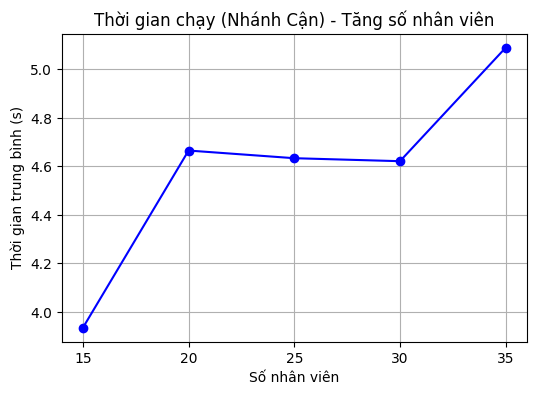

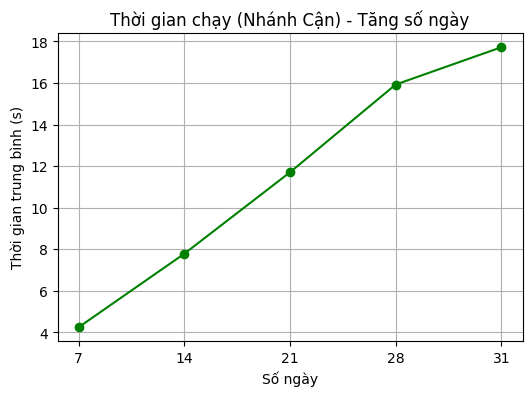

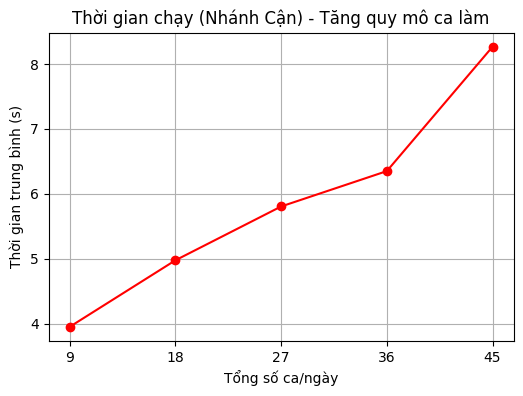

In [ ]:
# Tăng n
labels_n = ['15', '20', '25', '30', '35']
times_n = [time for _, time in results_n]

plt.figure(figsize=(6,4))
plt.plot(labels_n, times_n, marker='o', color='blue')
plt.title('Thời gian chạy (Nhánh Cận) - Tăng số nhân viên')
plt.xlabel('Số nhân viên')
plt.ylabel('Thời gian trung bình (s)')
plt.grid(True)
plt.show()

# Tăng d
labels_d = ['7', '14', '21', '28', '31']
times_d = [time for _, time in results_d]

plt.figure(figsize=(6,4))
plt.plot(labels_d, times_d, marker='o', color='green')
plt.title('Thời gian chạy (Nhánh Cận) - Tăng số ngày')
plt.xlabel('Số ngày')
plt.ylabel('Thời gian trung bình (s)')
plt.grid(True)
plt.show()

# Tăng k
labels_need = ['9', '18', '27', '36', '45']
times_need = [time for _, time in results_need]

plt.figure(figsize=(6,4))
plt.plot(labels_need, times_need, marker='o', color='red')
plt.title('Thời gian chạy (Nhánh Cận) - Tăng quy mô ca làm')
plt.xlabel('Tổng số ca/ngày')
plt.ylabel('Thời gian trung bình (s)')
plt.grid(True)
plt.show()


### Tính điểm tối ưu và vẽ biểu đồ

* Tính điểm tối ưu với 3 bộ dữ liệu

In [ ]:
results_score_n = []
for file, need in file_min_counts_n:
    total_score = 0
    need_tuple = (need[1], need[2], need[3])
    for i in range(1, 6):
        df = pd.read_excel(file, sheet_name=f'Sheet{i}')
        total_score += run_schedule(df, need_tuple, return_score=True)
    results_score_n.append((file, total_score / 5))

results_score_d = []
for file, need in file_min_counts_d:
    total_score = 0
    need_tuple = (need[1], need[2], need[3])
    for i in range(1, 6):
        df = pd.read_excel(file, sheet_name=f'Sheet{i}')
        total_score += run_schedule(df, need_tuple, return_score=True)
    results_score_d.append((file, total_score / 5))

results_score_k = []
for file, need in file_min_counts_need:
    total_score = 0
    need_tuple = (need[1], need[2], need[3])
    for i in range(1, 6):
        df = pd.read_excel(file, sheet_name=f'Sheet{i}')
        total_score += run_schedule(df, need_tuple, return_score=True)
    results_score_k.append((file, total_score / 5))

* Biểu đồ điểm tối ưu

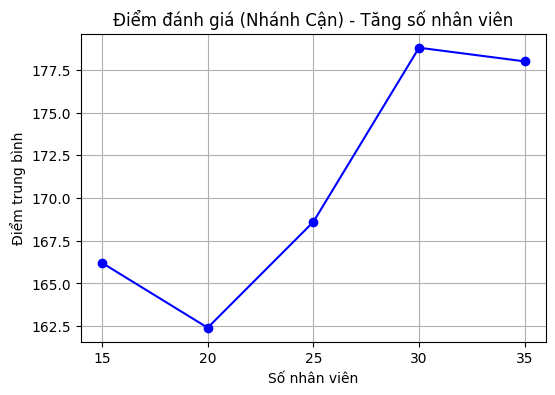

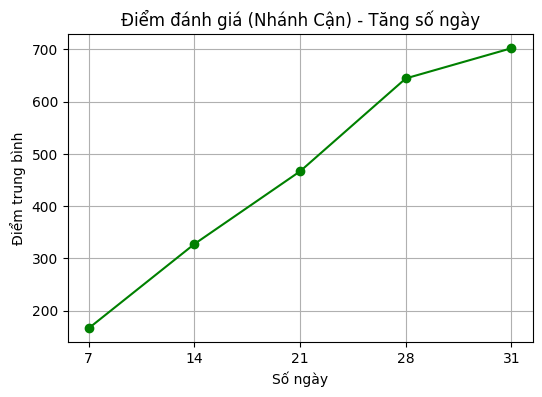

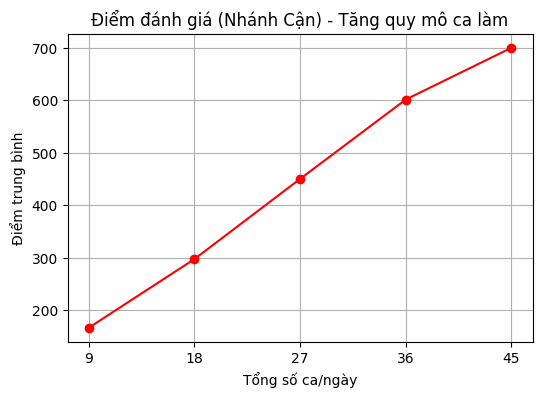

In [ ]:
# Tăng số nhân viên
labels_n = ['15', '20', '25', '30', '35']
scores_n = [score for _, score in results_score_n]

plt.figure(figsize=(6,4))
plt.plot(labels_n, scores_n, marker='o', color='blue')
plt.title('Điểm đánh giá (Nhánh Cận) - Tăng số nhân viên')
plt.xlabel('Số nhân viên')
plt.ylabel('Điểm trung bình')
plt.grid(True)
plt.show()

# Tăng số ngày làm việc
labels_d = ['7', '14', '21', '28', '31']
scores_d = [score for _, score in results_score_d]

plt.figure(figsize=(6,4))
plt.plot(labels_d, scores_d, marker='o', color='green')
plt.title('Điểm đánh giá (Nhánh Cận) - Tăng số ngày')
plt.xlabel('Số ngày')
plt.ylabel('Điểm trung bình')
plt.grid(True)
plt.show()

# Tăng yêu cầu mỗi ca (min_counts)
labels_k = ['9', '18', '27', '36', '45']
scores_k = [score for _, score in results_score_k]

plt.figure(figsize=(6,4))
plt.plot(labels_k, scores_k, marker='o', color='red')
plt.title('Điểm đánh giá (Nhánh Cận) - Tăng quy mô ca làm')
plt.xlabel('Tổng số ca/ngày')
plt.ylabel('Điểm trung bình')
plt.grid(True)
plt.show()


## Greedy

### Greedy với data gốc

In [ ]:
import pandas as pd
from typing import List, Tuple
import time

def greedy_schedule_from_existing_data(file_path='data/nhanvien_schedule.xlsx', NEED=(3,4,2)):
    df = pd.read_excel(file_path)
    employees: List[Tuple[int, int, int]] = list(df[['Rate_Morning', 'Rate_Afternoon', 'Rate_Evening']].itertuples(index=False, name=None))
    n = len(employees)
    days = [col for col in df.columns if col.startswith('Day')]

    start_time = time.perf_counter()

    for day_index, day in enumerate(days):
        print(f"\n--- Lịch cho {day} ---")

        # Tạo danh sách ca có thể làm của từng nhân viên trong ngày
        shift_register: List[set] = []
        for val in df[day]:
            val_str = str(val)
            shift_set = set()
            if '1' in val_str: shift_set.add(0)
            if '2' in val_str: shift_set.add(1)
            if '3' in val_str: shift_set.add(2)
            shift_register.append(shift_set)

        schedule = [[] for _ in range(n)] # danh sách các ca đã làm trong ngày của từng nhân viên
        shift_employees = {0: [], 1: [], 2: []} # nhân viên đã được gán theo từng ca

        total_score = 0

        for shift in range(3):
            required = NEED[shift]
            # Lọc ra các ứng viên có thể làm ca này
            candidates = [
                (i, employees[i][shift], len(schedule[i]))
                for i in range(n) if shift in shift_register[i]
            ]

            # Sắp xếp theo: điểm đánh giá cao, số ca đã làm ít
            sorted_candidates = sorted(candidates, key=lambda x: (-x[1], x[2]))

            assigned = 0
            for emp_id, rate, _ in sorted_candidates:
                if assigned >= required:
                    break
                if shift not in schedule[emp_id]:
                # Kiểm tra ca rời
                    if (shift == 2 and 0 in schedule[emp_id]) or (shift == 0 and 2 in schedule[emp_id]):
                        continue  # Bỏ qua nếu vi phạm ca rời

                    schedule[emp_id].append(shift)
                    shift_employees[shift].append(emp_id)
                    total_score += rate
                    assigned += 1

        print(f"Total rating: {total_score}")
        for shift in range(3):
            staff_list = ', '.join(f"Nhân viên {i}" for i in shift_employees[shift])
            if shift == 0:
                print(f"  Morning (Ca 1): {staff_list}")
            elif shift == 1:
                print(f"  Afternoon (Ca 2): {staff_list}")
            else:
                print(f"  Evening (Ca 3): {staff_list}")

    end_time = time.perf_counter()
    print(f"\nTổng thời gian chạy: {end_time - start_time:.4f} giây")

greedy_schedule_from_existing_data()


--- Lịch cho Day 1 ---
Total rating: 17
  Morning (Ca 1): Nhân viên 0, Nhân viên 9, Nhân viên 4
  Afternoon (Ca 2): Nhân viên 0, Nhân viên 8, Nhân viên 10, Nhân viên 12
  Evening (Ca 3): Nhân viên 8, Nhân viên 12

--- Lịch cho Day 2 ---
Total rating: 22
  Morning (Ca 1): Nhân viên 0, Nhân viên 9, Nhân viên 5
  Afternoon (Ca 2): Nhân viên 4, Nhân viên 6, Nhân viên 1, Nhân viên 0
  Evening (Ca 3): Nhân viên 11, Nhân viên 3

--- Lịch cho Day 3 ---
Total rating: 21
  Morning (Ca 1): Nhân viên 0, Nhân viên 7, Nhân viên 9
  Afternoon (Ca 2): Nhân viên 4, Nhân viên 1, Nhân viên 2, Nhân viên 0
  Evening (Ca 3): Nhân viên 12, Nhân viên 6

--- Lịch cho Day 4 ---
Total rating: 21
  Morning (Ca 1): Nhân viên 7, Nhân viên 9, Nhân viên 2
  Afternoon (Ca 2): Nhân viên 4, Nhân viên 11, Nhân viên 5, Nhân viên 8
  Evening (Ca 3): Nhân viên 10, Nhân viên 11

--- Lịch cho Day 5 ---
Total rating: 17
  Morning (Ca 1): Nhân viên 7, Nhân viên 12, Nhân viên 1
  Afternoon (Ca 2): Nhân viên 6, Nhân viên 0, Nhân

### Đo time, điểm tối ưu

In [ ]:
def run_schedule_greedy(df, NEED: Tuple[int, int, int], return_score=False):
    employees: List[Tuple[int, int, int]] = list(df[['Rate_Ca1', 'Rate_Ca2', 'Rate_Ca3']].itertuples(index=False, name=None))
    n = len(employees)
    days = [col for col in df.columns if col.startswith('Day')]

    total_score = 0
    start_time = time.perf_counter()

    for day in days:
        # Tạo danh sách ca có thể làm của từng nhân viên trong ngày
        shift_register: List[set] = []
        for val in df[day]:
            val_str = str(val)
            shift_set = set()
            if '1' in val_str: shift_set.add(0)
            if '2' in val_str: shift_set.add(1)
            if '3' in val_str: shift_set.add(2)
            shift_register.append(shift_set)

        schedule = [[] for _ in range(n)] # danh sách các ca đã làm trong ngày của từng nhân viên

        for shift in range(3):
            required = NEED[shift]
            candidates = [
                (i, employees[i][shift], len(schedule[i]))
                for i in range(n)
                if shift in shift_register[i]
            ]
            # Sắp xếp theo: điểm đánh giá cao, số ca đã làm ít
            sorted_candidates = sorted(candidates, key=lambda x: (-x[1], x[2]))

            assigned = 0
            for emp_id, rate, _ in sorted_candidates:
                if assigned >= required:
                    break
                if shift in schedule[emp_id]:
                    continue
                # Kiểm tra ca rời
                if (shift == 2 and 0 in schedule[emp_id]) or (shift == 0 and 2 in schedule[emp_id]):
                    continue
                schedule[emp_id].append(shift)
                total_score += rate
                assigned += 1

    end_time = time.perf_counter()
    return total_score if return_score else (end_time - start_time)

### So sánh thời gian của Greedy với các data khác nhau:

#### Tăng số nhân viên

In [ ]:
results_greedy_n = []
file_min_counts_n = [
    (data_n[0], {1:3, 2:4, 3:2}),
    (data_n[1], {1:3, 2:4, 3:2}),
    (data_n[2], {1:3, 2:4, 3:2}),
    (data_n[3], {1:3, 2:4, 3:2}),
    (data_n[4], {1:3, 2:4, 3:2}),
]

for file, need in file_min_counts_n:
    total_time = 0
    need_tuple = (need[1], need[2], need[3])
    for i in range(1, 6):
        df = pd.read_excel(file, sheet_name=f'Sheet{i}')
        total_time += run_schedule_greedy(df, need_tuple, return_score=False)
    results_greedy_n.append((file, total_time / 5))

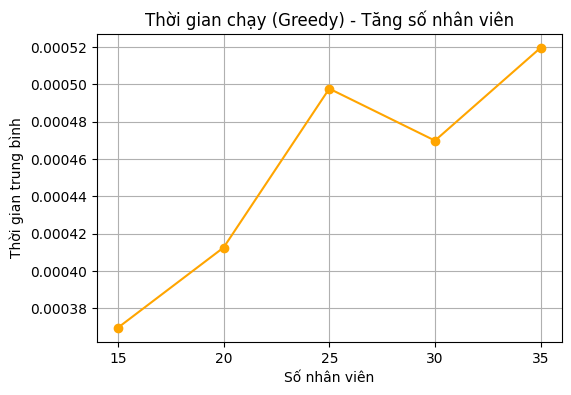

In [ ]:
labels_n = ['15', '20', '25', '30', '35']
times_greedy_n = [time for _, time in results_greedy_n]

plt.figure(figsize=(6,4))
plt.plot(labels_n, times_greedy_n, marker='o', color='orange')
plt.title('Thời gian chạy (Greedy) - Tăng số nhân viên')
plt.xlabel('Số nhân viên')
plt.ylabel('Thời gian trung bình')
plt.grid(True)
plt.show()

#### Tăng số ngày làm việc

In [ ]:
results_greedy_d = []
file_min_counts_d = [
    (data_d[0], {1:3, 2:4, 3:2}),
    (data_d[1], {1:3, 2:4, 3:2}),
    (data_d[2], {1:3, 2:4, 3:2}),
    (data_d[3], {1:3, 2:4, 3:2}),
    (data_d[4], {1:3, 2:4, 3:2}),
]

for file, need in file_min_counts_d:
    total_time = 0
    need_tuple = (need[1], need[2], need[3])
    for i in range(1, 6):
        df = pd.read_excel(file, sheet_name=f'Sheet{i}')
        total_time += run_schedule_greedy(df, need_tuple, return_score=False)
    results_greedy_d.append((file, total_time / 5))

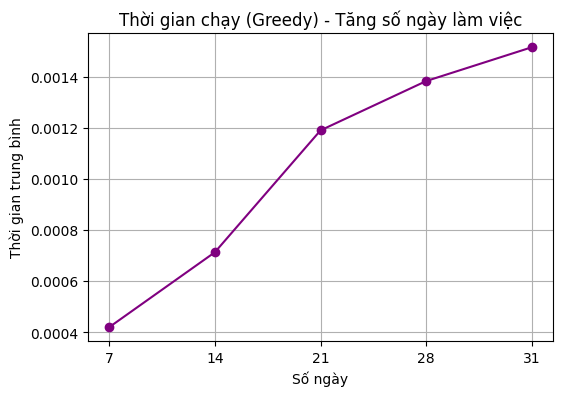

In [ ]:
labels_d = ['7', '14', '21', '28', '31']
times_greedy_d = [time for _, time in results_greedy_d]

plt.figure(figsize=(6,4))
plt.plot(labels_d, times_greedy_d, marker='o', color='purple')
plt.title('Thời gian chạy (Greedy) - Tăng số ngày làm việc')
plt.xlabel('Số ngày')
plt.ylabel('Thời gian trung bình')
plt.grid(True)
plt.show()

#### Tăng quy mô ca làm

In [ ]:
results_greedy_need = []
file_min_counts_need = [
    (data_k[0], {1:3, 2:4, 3:2}),
    (data_k[1], {1:6, 2:8, 3:4}),
    (data_k[2], {1:9, 2:12, 3:6}),
    (data_k[3], {1:12, 2:16, 3:8}),
    (data_k[4], {1:15, 2:20, 3:10}),
]

for file, need in file_min_counts_need:
    total_time = 0
    need_tuple = (need[1], need[2], need[3])
    for i in range(1, 6):
        df = pd.read_excel(file, sheet_name=f'Sheet{i}')
        total_time += run_schedule_greedy(df, need_tuple, return_score=False)
    results_greedy_need.append((file, total_time / 5))

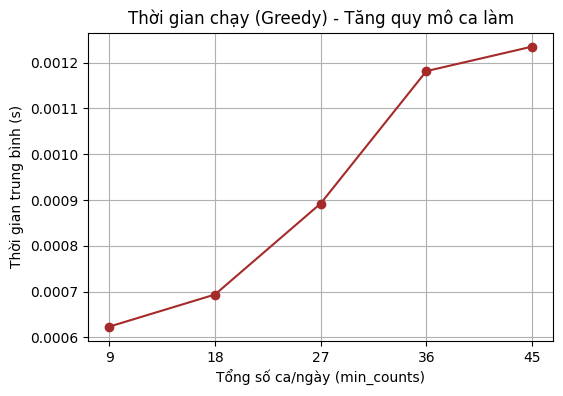

In [ ]:
labels_need = ['9', '18', '27', '36', '45']
times_greedy_need = [time for _, time in results_greedy_need]

plt.figure(figsize=(6,4))
plt.plot(labels_need, times_greedy_need, marker='o', color='brown')
plt.title('Thời gian chạy (Greedy) - Tăng quy mô ca làm')
plt.xlabel('Tổng số ca/ngày (min_counts)')
plt.ylabel('Thời gian trung bình (s)')
plt.grid(True)
plt.show()

### So sánh điểm đánh giá của Greedy với các data khác nhau:

#### Tăng số nhân viên

In [ ]:
results_score_greedy_n = []
for file, need in file_min_counts_n:
    total_score = 0
    need_tuple = (need[1], need[2], need[3])
    for i in range(1, 6):
        df = pd.read_excel(file, sheet_name=f'Sheet{i}')
        total_score += run_schedule_greedy(df, need_tuple, return_score=True)
    results_score_greedy_n.append((file, total_score / 5))

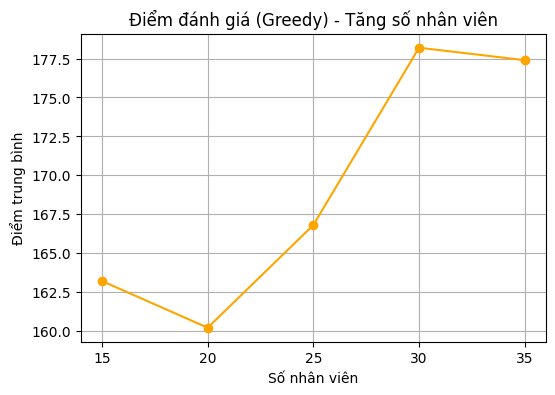

In [ ]:
labels_n = ['15', '20', '25', '30', '35']
scores_greedy_n = [score for _, score in results_score_greedy_n]

plt.figure(figsize=(6,4))
plt.plot(labels_n, scores_greedy_n, marker='o', color='orange')
plt.title('Điểm đánh giá (Greedy) - Tăng số nhân viên')
plt.xlabel('Số nhân viên')
plt.ylabel('Điểm trung bình')
plt.grid(True)
plt.show()

#### Tăng số ngày làm việc

In [ ]:
results_score_greedy_d = []
for file, need in file_min_counts_d:
    total_score = 0
    need_tuple = (need[1], need[2], need[3])
    for i in range(1, 6):
        df = pd.read_excel(file, sheet_name=f'Sheet{i}')
        total_score += run_schedule_greedy(df, need_tuple, return_score=True)
    results_score_greedy_d.append((file, total_score / 5))

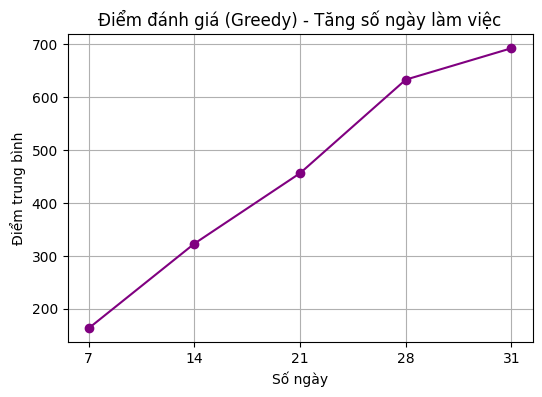

In [ ]:
labels_d = ['7', '14', '21', '28', '31']
scores_greedy_d = [score for _, score in results_score_greedy_d]

plt.figure(figsize=(6,4))
plt.plot(labels_d, scores_greedy_d, marker='o', color='purple')
plt.title('Điểm đánh giá (Greedy) - Tăng số ngày làm việc')
plt.xlabel('Số ngày')
plt.ylabel('Điểm trung bình')
plt.grid(True)
plt.show()

#### Tăng quy mô ca làm

In [ ]:
results_score_greedy_k = []
for file, need in file_min_counts_need:
    total_score = 0
    need_tuple = (need[1], need[2], need[3])
    for i in range(1, 6):
        df = pd.read_excel(file, sheet_name=f'Sheet{i}')
        total_score += run_schedule_greedy(df, need_tuple, return_score=True)
    results_score_greedy_k.append((file, total_score / 5))

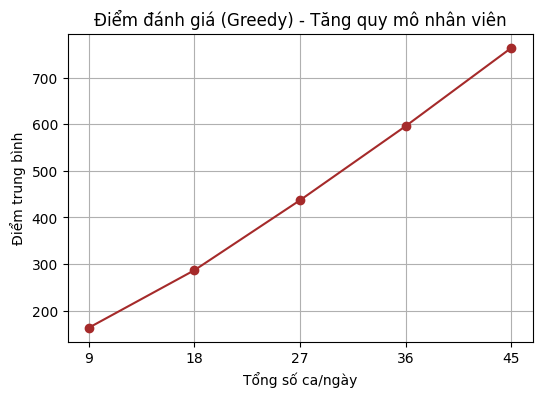

In [ ]:
labels_k = ['9', '18', '27', '36', '45']
scores_greedy_k = [score for _, score in results_score_greedy_k]

plt.figure(figsize=(6,4))
plt.plot(labels_k, scores_greedy_k, marker='o', color='brown')
plt.title('Điểm đánh giá (Greedy) - Tăng quy mô nhân viên')
plt.xlabel('Tổng số ca/ngày')
plt.ylabel('Điểm trung bình')
plt.grid(True)
plt.show()

## Dynamic Programming



### Hàm xếp lịch tối ưu

In [ ]:
# Đọc dữ liệu từ file Excel
file_path = 'data/nhanvien_schedule.xlsx'
df = pd.read_excel(file_path)

# Mỗi nhân viên sẽ được lưu dưới dạng tuple: (rate_morning, rate_afternoon, rate_evening)
employees: List[Tuple[int, int, int]] = list(df[['Rate_Morning', 'Rate_Afternoon', 'Rate_Evening']].itertuples(index=False, name=None))
n = len(employees)

# Số ca cần mỗi ngày
NEED = (3, 4, 2)  # (morning, afternoon, evening)

# Danh sách các ngày
days = [col for col in df.columns if col.startswith('Day')]


for day in days:
    print(f"\n--- Lịch cho {day} ---")

    # Đăng ký ca từ cột tương ứng
    shift_register: List[set] = []
    for val in df[day]:
        val_str = str(val)
        shift_set = set()
        if '1' in val_str: shift_set.add(0)  # morning
        if '2' in val_str: shift_set.add(1)  # afternoon
        if '3' in val_str: shift_set.add(2)  # evening
        shift_register.append(shift_set)

    # dp[state] = (total_score, total_shifts, assignment)
    dp: Dict[Tuple[int, int, int], Tuple[int, int, List[List[int]]]] = {}
    dp[(0, 0, 0)] = (0, 0, [[] for _ in range(n)])  # base case

    for i, (rm, ra, re) in enumerate(employees):
        new_dp = dp.copy()
        allowed = shift_register[i]

        for (m, a, e), (score, shifts, assignment) in dp.items():
            for take in [(1, 0, 0), (0, 1, 0), (0, 0, 1),
                         (1, 1, 0), (0, 1, 1),
                         (1, 1, 1)]:
                # Tránh ca rời
                if take[0] and take[2]:
                    continue

                # Chỉ xét ca đã đăng ký
                if any(take[j] and j not in allowed for j in range(3)):
                    continue

                nm, na, ne = m + take[0], a + take[1], e + take[2]
                if nm > NEED[0] or na > NEED[1] or ne > NEED[2]:
                    continue

                new_score = score + rm * take[0] + ra * take[1] + re * take[2]
                new_shifts = shifts + sum(take)

                new_assignment = [row[:] for row in assignment]
                new_assignment[i] = list(take)

                key = (nm, na, ne)
                if key not in new_dp or (
                    new_score > new_dp[key][0] or
                    (new_score == new_dp[key][0] and new_shifts < new_dp[key][1])
                ):
                    new_dp[key] = (new_score, new_shifts, new_assignment)

        dp = new_dp

    # Lấy kết quả tối ưu cho ngày
    final_state = NEED
    if final_state in dp:
        best_score, best_shifts, best_assignment = dp[final_state]
        print(f"Tổng điểm: {best_score}, Tổng ca: {best_shifts}")
        for i, shifts in enumerate(best_assignment):
            if any(shifts):
                ca = []
                if shifts[0]: ca.append("Sáng")
                if shifts[1]: ca.append("Chiều")
                if shifts[2]: ca.append("Tối")
                print(f"Nhân viên {i}: {', '.join(ca)}")
    else:
        print("Không tìm được phân công thoả mãn.")


--- Lịch cho Day 1 ---
Tổng điểm: 17, Tổng ca: 9
Nhân viên 0: Sáng, Chiều
Nhân viên 4: Sáng
Nhân viên 8: Chiều, Tối
Nhân viên 9: Sáng
Nhân viên 10: Chiều
Nhân viên 12: Chiều, Tối

--- Lịch cho Day 2 ---
Tổng điểm: 22, Tổng ca: 9
Nhân viên 0: Sáng, Chiều
Nhân viên 4: Chiều, Tối
Nhân viên 5: Sáng
Nhân viên 6: Chiều
Nhân viên 9: Sáng, Chiều
Nhân viên 11: Tối

--- Lịch cho Day 3 ---
Tổng điểm: 22, Tổng ca: 9
Nhân viên 0: Sáng, Chiều
Nhân viên 1: Chiều
Nhân viên 4: Chiều
Nhân viên 7: Chiều, Tối
Nhân viên 8: Sáng
Nhân viên 9: Sáng
Nhân viên 12: Tối

--- Lịch cho Day 4 ---
Tổng điểm: 21, Tổng ca: 9
Nhân viên 2: Sáng
Nhân viên 4: Chiều
Nhân viên 5: Chiều
Nhân viên 7: Sáng
Nhân viên 8: Chiều
Nhân viên 9: Sáng
Nhân viên 10: Tối
Nhân viên 11: Chiều, Tối

--- Lịch cho Day 5 ---
Tổng điểm: 17, Tổng ca: 9
Nhân viên 0: Chiều
Nhân viên 1: Sáng, Chiều
Nhân viên 2: Sáng
Nhân viên 6: Chiều, Tối
Nhân viên 7: Sáng, Chiều
Nhân viên 12: Tối

--- Lịch cho Day 6 ---
Tổng điểm: 18, Tổng ca: 9
Nhân viên 0: Chiề

### Hàm đo thời gian chạy/tính điểm tối ưu

In [8]:
def run_schedule(df, NEED, return_score=False):
    employees = list(df[['Rate_Ca1', 'Rate_Ca2', 'Rate_Ca3']].itertuples(index=False, name=None))
    n = len(employees)
    days = [col for col in df.columns if col.startswith('Day')]

    total_score = 0
    start_time = time.time()

    for day in days:
        shift_register = []
        for val in df[day]:
            val_str = str(val)
            shift_set = set()
            if '1' in val_str: shift_set.add(0)
            if '2' in val_str: shift_set.add(1)
            if '3' in val_str: shift_set.add(2)
            shift_register.append(shift_set)

        dp = {}
        dp[(0, 0, 0)] = (0, 0, [[] for _ in range(n)])

        for i, (rm, ra, re) in enumerate(employees):
            new_dp = dp.copy()
            allowed = shift_register[i]
            for (m, a, e), (score, shifts, assignment) in dp.items():
                for take in [(1,0,0),(0,1,0),(0,0,1),(1,1,0),(0,1,1),(1,1,1)]:
                    if take[0] and take[2]: continue
                    if any(take[j] and j not in allowed for j in range(3)): continue
                    nm, na, ne = m + take[0], a + take[1], e + take[2]
                    if nm > NEED[0] or na > NEED[1] or ne > NEED[2]: continue
                    new_score = score + rm*take[0] + ra*take[1] + re*take[2]
                    new_shifts = shifts + sum(take)
                    new_assignment = [row[:] for row in assignment]
                    new_assignment[i] = list(take)
                    key = (nm, na, ne)
                    if key not in new_dp or (
                        new_score > new_dp[key][0] or
                        (new_score == new_dp[key][0] and new_shifts < new_dp[key][1])
                    ):
                        new_dp[key] = (new_score, new_shifts, new_assignment)
            dp = new_dp

        best_key = (NEED[0], NEED[1], NEED[2])
        if best_key in dp:
            total_score += dp[best_key][0]

    end_time = time.time()
    return total_score if return_score else (end_time - start_time)

### Đo thời gian chạy và vẽ biểu đồ

* Tăng nhân viên (n)

In [15]:
results_n = []
file_min_counts_n = [
    (data_n[0], {1:3, 2:4, 3:2}),
    (data_n[1], {1:3, 2:4, 3:2}),
    (data_n[2], {1:3, 2:4, 3:2}),
    (data_n[3], {1:3, 2:4, 3:2}),
    (data_n[4], {1:3, 2:4, 3:2}),
]

for file, need in file_min_counts_n:
    total_time = 0
    need_tuple = (need[1], need[2], need[3])  # chuyển dict sang tuple
    for i in range(1, 6):
        df = pd.read_excel(file, sheet_name=f'Sheet{i}')
        total_time += run_schedule(df, need_tuple,return_score=False)
    results_n.append((file, total_time / 5))

* Tăng ngày (d)

In [ ]:
results_d = []
file_min_counts_d = [
    (data_d[0], {1:3, 2:4, 3:2}),
    (data_d[1], {1:3, 2:4, 3:2}),
    (data_d[2], {1:3, 2:4, 3:2}),
    (data_d[3], {1:3, 2:4, 3:2}),
    (data_d[4], {1:3, 2:4, 3:2}),
]

for file, need in file_min_counts_d:
    total_time = 0
    need_tuple = (need[1], need[2], need[3])
    for i in range(1, 6):
        df = pd.read_excel(file, sheet_name=f'Sheet{i}')
        total_time += run_schedule(df, need_tuple, return_score=False)
    results_d.append((file, total_time / 5))

* Tăng nhân viên 1 ngày (k)

In [ ]:
results_need = []
file_min_counts_need = [
    (data_k[0], {1:3, 2:4, 3:2}),
    (data_k[1], {1:6, 2:8, 3:4}),
    (data_k[2], {1:9, 2:12, 3:6}),
    (data_k[3], {1:12, 2:16, 3:8}),
    (data_k[4], {1:15, 2:20, 3:10}),
]

for file, need in file_min_counts_need:
    total_time = 0
    need_tuple = (need[1], need[2], need[3])
    for i in range(1, 6):
        df = pd.read_excel(file, sheet_name=f'Sheet{i}')
        total_time += run_schedule(df, need_tuple, return_score=False)
    results_need.append((file, total_time / 5))

* Biểu đồ so sánh thời gian chạy

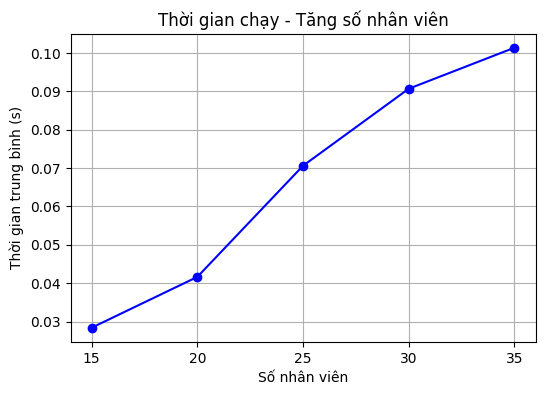

<Figure size 640x480 with 0 Axes>

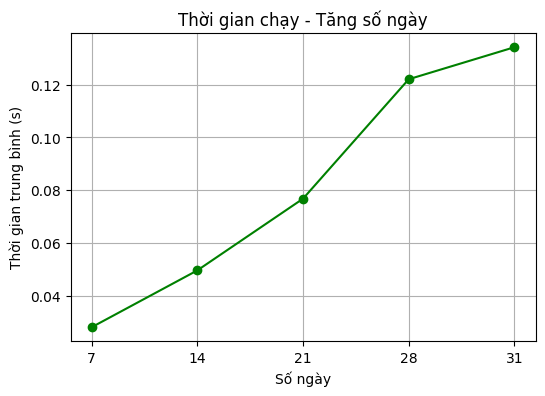

<Figure size 640x480 with 0 Axes>

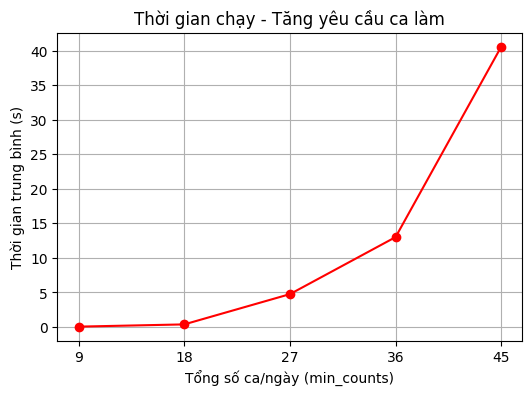

<Figure size 640x480 with 0 Axes>

In [ ]:
# Tăng n
labels_n = ['15', '20', '25', '30', '35']
times_n = [time for _, time in results_n]

plt.figure(figsize=(6,4))
plt.plot(labels_n, times_n, marker='o', color='blue')
plt.title('Thời gian chạy - Tăng số nhân viên')
plt.xlabel('Số nhân viên')
plt.ylabel('Thời gian trung bình (s)')
plt.grid(True)
plt.show()

# Tăng d
labels_d = ['7', '14', '21', '28', '31']
times_d = [time for _, time in results_d]

plt.figure(figsize=(6,4))
plt.plot(labels_d, times_d, marker='o', color='green')
plt.title('Thời gian chạy - Tăng số ngày')
plt.xlabel('Số ngày')
plt.ylabel('Thời gian trung bình (s)')
plt.grid(True)
plt.show()

# Tăng k
labels_need = ['9', '18', '27', '36', '45']
times_need = [time for _, time in results_need]

plt.figure(figsize=(6,4))
plt.plot(labels_need, times_need, marker='o', color='red')
plt.title('Thời gian chạy - Tăng yêu cầu ca làm')
plt.xlabel('Tổng số ca/ngày (min_counts)')
plt.ylabel('Thời gian trung bình (s)')
plt.grid(True)
plt.show()

### Tính điểm tối ưu và vẽ biểu đồ

* Tính điểm tối ưu với 3 bộ dữ liệu riêng

In [ ]:
results_score_n = []
for file, need in file_min_counts_n:
    total_score = 0
    need_tuple = (need[1], need[2], need[3])
    for i in range(1, 6):
        df = pd.read_excel(file, sheet_name=f'Sheet{i}')
        total_score += run_schedule(df, need_tuple, return_score=True)
    results_score_n.append((file, total_score / 5))

results_score_d = []
for file, need in file_min_counts_d:
    total_score = 0
    need_tuple = (need[1], need[2], need[3])
    for i in range(1, 6):
        df = pd.read_excel(file, sheet_name=f'Sheet{i}')
        total_score += run_schedule(df, need_tuple, return_score=True)
    results_score_d.append((file, total_score / 5))

results_score_k = []
for file, need in file_min_counts_need:
    total_score = 0
    need_tuple = (need[1], need[2], need[3])
    for i in range(1, 6):
        df = pd.read_excel(file, sheet_name=f'Sheet{i}')
        total_score += run_schedule(df, need_tuple, return_score=True)
    results_score_k.append((file, total_score / 5))

* Biểu đồ so sánh điểm tối ưu

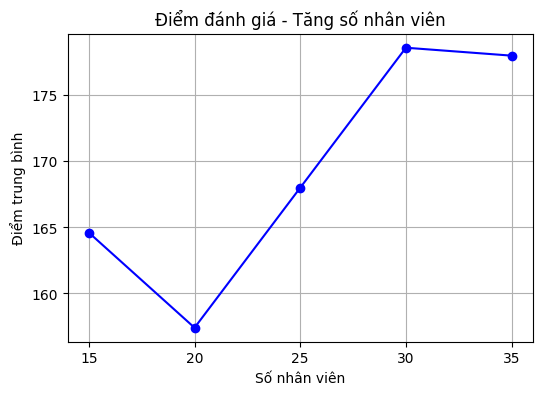

<Figure size 640x480 with 0 Axes>

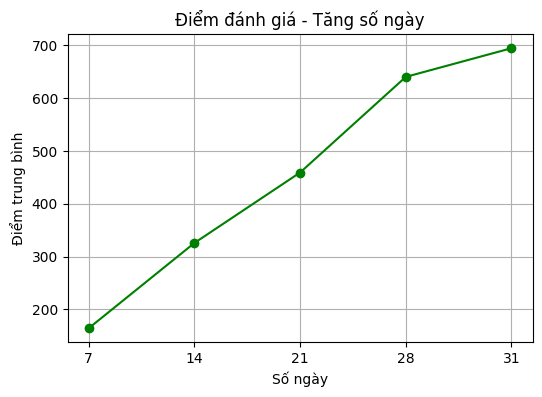

<Figure size 640x480 with 0 Axes>

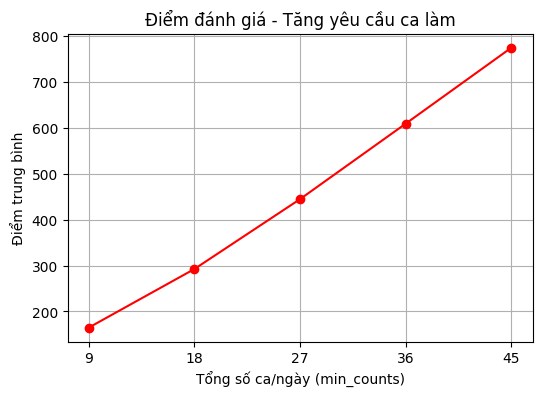

<Figure size 640x480 with 0 Axes>

In [ ]:
# Tăng số nhân viên
labels_n = ['15', '20', '25', '30', '35']
scores_n = [score for _, score in results_score_n]

plt.figure(figsize=(6,4))
plt.plot(labels_n, scores_n, marker='o', color='blue')
plt.title('Điểm đánh giá - Tăng số nhân viên')
plt.xlabel('Số nhân viên')
plt.ylabel('Điểm trung bình')
plt.grid(True)
plt.show()


# Tăng số ngày làm việc
labels_d = ['7', '14', '21', '28', '31']
scores_d = [score for _, score in results_score_d]

plt.figure(figsize=(6,4))
plt.plot(labels_d, scores_d, marker='o', color='green')
plt.title('Điểm đánh giá - Tăng số ngày')
plt.xlabel('Số ngày')
plt.ylabel('Điểm trung bình')
plt.grid(True)
plt.show()


# Tăng yêu cầu mỗi ca (min_counts)
labels_k = ['9', '18', '27', '36', '45']
scores_k = [score for _, score in results_score_k]

plt.figure(figsize=(6,4))
plt.plot(labels_k, scores_k, marker='o', color='red')
plt.title('Điểm đánh giá - Tăng yêu cầu ca làm')
plt.xlabel('Tổng số ca/ngày (min_counts)')
plt.ylabel('Điểm trung bình')
plt.grid(True)
plt.show()

# So sánh 4 thuật toán với dữ liệu gốc

In [ ]:
import pandas as pd
import numpy as np
import time
import os
import matplotlib.pyplot as plt
from itertools import combinations
import heapq
from typing import List, Tuple, Dict, Set

# --- Các hàm của thuật toán vét cạn (Brute Force) ---

def is_valid_combo(combo, shift_num, day, df):
    for idx in combo:
        # Ensure that the employee is registered for the specific shift
        if str(shift_num) not in str(df.loc[idx, day]):
            return False
    return True

def best_schedule_for_day_bf(df, day):
    best_score = -1
    best_assignment = None
    required_morning = 3
    required_afternoon = 4
    required_evening = 2

    # Pre-filter employees who are registered for each shift
    valid_morning = [i for i in range(len(df)) if '1' in str(df.loc[i, day])]
    valid_afternoon = [i for i in range(len(df)) if '2' in str(df.loc[i, day])]
    valid_evening = [i for i in range(len(df)) if '3' in str(df.loc[i, day])]

    # Iterate through all combinations
    for morning_indices in combinations(valid_morning, required_morning):
        # Candidates for afternoon shift must not be in morning shift (to avoid double counting for same employee)
        # and must be registered for afternoon
        remaining_afternoon_candidates = set(valid_afternoon)
        if len(remaining_afternoon_candidates) < required_afternoon:
            continue

        for afternoon_indices in combinations(remaining_afternoon_candidates, required_afternoon):
            # Candidates for evening shift must not be in morning or afternoon shift
            # and must be registered for evening
            remaining_evening_candidates = set(valid_evening)
            if len(remaining_evening_candidates) < required_evening:
                continue

            for evening_indices in combinations(remaining_evening_candidates, required_evening):
                # Check for split shifts (Morning-Evening without Afternoon)
                is_valid_split_shift = True
                for emp_idx in set(morning_indices) | set(evening_indices):
                    # If employee is in morning AND evening, they MUST be in afternoon
                    if emp_idx in morning_indices and emp_idx in evening_indices and emp_idx not in afternoon_indices:
                        is_valid_split_shift = False
                        break
                if not is_valid_split_shift:
                    continue

                # Calculate score for this combination
                score = (
                    sum(df.loc[i, 'Rate_Morning'] for i in morning_indices) +
                    sum(df.loc[i, 'Rate_Afternoon'] for i in afternoon_indices) +
                    sum(df.loc[i, 'Rate_Evening'] for i in evening_indices)
                )

                # Update best score and assignment
                if score > best_score:
                    best_score = score
                    best_assignment = {
                        'Morning (Ca 1)': morning_indices,
                        'Afternoon (Ca 2)': afternoon_indices,
                        'Evening (Ca 3)': evening_indices
                    }
    return best_score, best_assignment

def run_brute_force_algo(df_input, days_to_run):
    start_time = time.time()
    total_score = 0
    for day in days_to_run:
        score_for_day, _ = best_schedule_for_day_bf(df_input, day)
        if score_for_day != -1: # Only add if a valid schedule was found
            total_score += score_for_day
        else: # Handle cases where no valid schedule was found for a day
            # For simplicity in averaging, we can consider 0 or a very low number,
            # or exclude this day from the average.
            # Here, we'll just add 0 if no valid schedule.
            pass
    end_time = time.time()
    return end_time - start_time, total_score



## Các hàm của thuật toán nhánh cận (Branch and Bound)

# Helper functions remain the same
def evaluate_day_schedule(schedule, ratings, shifts):
    total_rating = 0
    for shift in shifts:
        emp_indices = np.where(schedule[shift] == 1)[0]
        for emp in emp_indices:
            total_rating += ratings[shift][emp]
    return total_rating

def is_valid_day_schedule(schedule, min_staff, shifts, availability):
    for shift in shifts:
        count = np.sum(schedule[shift])
        if count != min_staff[shift]:
            return False

    for emp in range(len(schedule[shifts[0]])):
        if schedule['1'][emp] == 1 and schedule['3'][emp] == 1 and schedule['2'][emp] == 0:
            return False

        for shift in shifts:
            if schedule[shift][emp] == 1 and availability[shift][emp] == 0:
                return False
    return True

def calculate_heuristic_with_balance(node, ratings, min_staff, shifts, n_employees, availability, current_workload):
    current_value = evaluate_day_schedule(node['schedule'], ratings, shifts)
    potential = 0
    for shift in shifts:
        assigned = np.sum(node['schedule'][shift])
        needed = max(0, min_staff[shift] - assigned)

        remaining_options = []
        for i in range(node['level'], len(node['decisions'])):
            s, emp = node['decisions'][i]
            if s == shift and availability[shift][emp] == 1 and node['schedule'][shift][emp] == 0:
                remaining_options.append(ratings[shift][emp])

        if remaining_options and needed > 0:
            remaining_options.sort(reverse=True)
            potential += sum(remaining_options[:needed])

    return current_value + potential * 0.8 # Heuristic factor

def can_assign_employee_to_shift(node, shift, emp, min_staff, availability):
    current_schedule = node['schedule']

    if availability[shift][emp] == 0:
        return False

    current_count = np.sum(current_schedule[shift])
    if current_count >= min_staff[shift]:
        return False

    if shift == '1' and current_schedule['3'][emp] == 1 and current_schedule['2'][emp] == 0:
        return False
    if shift == '3' and current_schedule['1'][emp] == 1 and current_schedule['2'][emp] == 0:
        return False
    return True

def branch_and_bound_day_with_constraints(ratings, min_staff, shifts, n_employees, availability, max_nodes=5000):
    current_workload = np.zeros(n_employees, dtype=int)
    empty_schedule = {shift: np.zeros(n_employees, dtype=int) for shift in shifts}

    decisions = []
    for shift in shifts:
        shift_decisions = []
        for emp in range(n_employees):
            if availability[shift][emp] == 1:  # Chỉ xét nhân viên đã đăng ký
                # Tính priority: rating cao + ít ca hơn
                workload_bonus = max(0, 3 - current_workload[emp]) * 0.1
                priority = ratings[shift][emp] + workload_bonus
                shift_decisions.append((priority, shift, emp))

        # Sắp xếp theo priority giảm dần
        shift_decisions.sort(reverse=True)
        decisions.extend([(shift, emp) for _, shift, emp in shift_decisions])

    root = {
        'schedule': empty_schedule,
        'level': 0,
        'decisions': decisions,
        'workload': current_workload.copy()
    }

    queue = []
    heapq.heappush(queue, (-calculate_heuristic_with_balance(root, ratings, min_staff, shifts, n_employees, availability, current_workload),
                          -evaluate_day_schedule(root['schedule'], ratings, shifts),
                          id(root), root))

    best_value = 0
    best_solution = {shift: np.zeros(n_employees, dtype=int) for shift in shifts}
    nodes_explored = 0
    valid_solutions_found = 0
    while queue and nodes_explored < max_nodes:

        _, _, _, node = heapq.heappop(queue)
        nodes_explored += 1

        if node['level'] == len(node['decisions']):
            if is_valid_day_schedule(node['schedule'], min_staff, shifts, availability):
                valid_solutions_found += 1
                value = evaluate_day_schedule(node['schedule'], ratings, shifts)

                # Thêm bonus cho solution cân bằng workload tốt hơn
                workload_variance = np.var([np.sum([node['schedule'][s][emp] for s in shifts]) for emp in range(n_employees)])
                balance_bonus = max(0, 1.0 - workload_variance) * 0.1
                adjusted_value = value + balance_bonus

                if adjusted_value > best_value:
                    best_value = value  # Vẫn trả về giá trị gốc
                    best_solution = {shift: node['schedule'][shift].copy() for shift in shifts}
        else:
            shift, emp = node['decisions'][node['level']]

            # Thử không gán nhân viên này vào ca
            child_0 = {
                'schedule': {s: node['schedule'][s].copy() for s in shifts},
                'level': node['level'] + 1,
                'decisions': node['decisions'],
                'workload': node['workload'].copy()
            }

            heuristic_0 = calculate_heuristic_with_balance(child_0, ratings, min_staff, shifts, n_employees, availability, child_0['workload'])
            heapq.heappush(queue, (-heuristic_0, -evaluate_day_schedule(child_0['schedule'], ratings, shifts), id(child_0), child_0))

            # Thử gán nhân viên này vào ca (chỉ khi hợp lệ)
            if can_assign_employee_to_shift(node, shift, emp, min_staff, availability):
                new_schedule = {s: node['schedule'][s].copy() for s in shifts}
                new_schedule[shift][emp] = 1
                new_workload = node['workload'].copy()
                new_workload[emp] += 1

                child_1 = {
                    'schedule': new_schedule,
                    'level': node['level'] + 1,
                    'decisions': node['decisions'],
                    'workload': new_workload
                }

                heuristic_1 = calculate_heuristic_with_balance(child_1, ratings, min_staff, shifts, n_employees, availability, new_workload)
                heapq.heappush(queue, (-heuristic_1, -evaluate_day_schedule(child_1['schedule'], ratings, shifts), id(child_1), child_1))
    if valid_solutions_found == 0:
        return None
    return best_value # Return the best found value for the day

def run_branch_and_bound_algo(df_input, days_to_run):
    start_time = time.time()
    n_employees = len(df_input)

    shifts = ['1', '2', '3']
    min_staff = {'1': 3, '2': 4, '3': 2} # NEED

    ratings = {}
    try:
        if 'Rate_Ca1' in df_input.columns: # Adjust column names as per your Excel file
            ratings['1'] = df_input['Rate_Ca1'].values
            ratings['2'] = df_input['Rate_Ca2'].values
            ratings['3'] = df_input['Rate_Ca3'].values
        elif 'Rate_Morning' in df_input.columns:
            ratings['1'] = df_input['Rate_Morning'].values
            ratings['2'] = df_input['Rate_Afternoon'].values
            ratings['3'] = df_input['Rate_Evening'].values
        else:
            return 0, 0 # Return 0 for time and score if rating columns are not found
    except KeyError:
        return 0, 0

    total_score = 0
    for day in days_to_run:
        if day not in df_input.columns:
            continue

        day_data = df_input[day].values
        availability = {'1': np.zeros(n_employees, dtype=int),
                        '2': np.zeros(n_employees, dtype=int),
                        '3': np.zeros(n_employees, dtype=int)}

        for emp in range(n_employees):
            shifts_available = str(day_data[emp]) if pd.notna(day_data[emp]) else ""
            if '1' in shifts_available: availability['1'][emp] = 1
            if '2' in shifts_available: availability['2'][emp] = 1
            if '3' in shifts_available: availability['3'][emp] = 1

        score_for_day = branch_and_bound_day_with_constraints(ratings, min_staff, shifts, n_employees, availability)
        if score_for_day is not None and score_for_day != -1: # -1 implies no solution found
            total_score += score_for_day
        else:
            # Handle cases where no valid schedule was found for a day
            pass

    end_time = time.time()
    return end_time - start_time, total_score



## Các hàm của thuật toán tham lam (Greedy)

def run_greedy_algo(df_input, days_to_run, NEED=(3,4,2)):
    employees: List[Tuple[int, int, int]] = list(df_input[['Rate_Morning', 'Rate_Afternoon', 'Rate_Evening']].itertuples(index=False, name=None))
    n = len(employees)

    start_time = time.perf_counter()
    total_score = 0

    for day_index, day in enumerate(days_to_run):
        if day not in df_input.columns:
            continue

        shift_register: List[Set[int]] = []
        for val in df_input[day]:
            val_str = str(val)
            shift_set = set()
            if '1' in val_str: shift_set.add(0) # Ca 1 -> index 0 (Morning)
            if '2' in val_str: shift_set.add(1) # Ca 2 -> index 1 (Afternoon)
            if '3' in val_str: shift_set.add(2) # Ca 3 -> index 2 (Evening)
            shift_register.append(shift_set)

        schedule = [[] for _ in range(n)] # shifts assigned to each employee for the day
        current_shift_counts = [0, 0, 0] # Track how many employees are assigned to each shift
        day_score = 0

        shift_order = [0, 1, 2] # Morning, Afternoon, Evening

        for shift in shift_order:
            required = NEED[shift]
            candidates = []
            for i in range(n):
                if shift in shift_register[i]:
                    current_employee_score = employees[i][shift]
                    would_be_split_shift = False
                    if shift == 0 and 2 in schedule[i] and 1 not in schedule[i]:
                        would_be_split_shift = True
                    if shift == 2 and 0 in schedule[i] and 1 not in schedule[i]:
                        would_be_split_shift = True
                    candidates.append((current_employee_score, -len(schedule[i]), -i, i))

            candidates.sort(key=lambda x: (-x[0], x[1], x[2]), reverse=False)

            assigned_count = 0
            for rate, num_shifts, neg_emp_id, emp_id in candidates:
                if assigned_count >= required:
                    break

                if shift not in schedule[emp_id]:
                    is_split_shift = False
                    if shift == 0 and 2 in schedule[emp_id] and 1 not in schedule[emp_id]:
                        is_split_shift = True
                    if shift == 2 and 0 in schedule[emp_id] and 1 not in schedule[emp_id]:
                        is_split_shift = True

                    if not is_split_shift:
                        schedule[emp_id].append(shift)
                        day_score += employees[emp_id][shift]
                        assigned_count += 1
                        current_shift_counts[shift] += 1

        # **Sửa ở đây: chỉ cộng điểm nếu đủ nhân viên cho tất cả các ca**
        all_shifts_filled = True
        for s_idx in range(3):
            if current_shift_counts[s_idx] < NEED[s_idx]:
                all_shifts_filled = False
                break

        if all_shifts_filled:
            total_score += day_score
        else:
            # Không cộng điểm nếu ca chưa đủ người
            total_score += 0
            # print(f"Ngày {day}: không đủ nhân viên ca, điểm = 0")  # Bật comment nếu muốn debug

    end_time = time.perf_counter()
    return end_time - start_time, total_score



## Các hàm của thuật toán quy hoạch động (Dynamic Programming)

def run_dynamic_programming_algo(df_input, days_to_run, NEED=(3,4,2)):
    start_time = time.perf_counter()
    total_score = 0

    employees: List[Tuple[int, int, int]] = list(df_input[['Rate_Morning', 'Rate_Afternoon', 'Rate_Evening']].itertuples(index=False, name=None))
    n = len(employees)

    for day in days_to_run:
        if day not in df_input.columns:
            continue

        shift_register: List[Set[int]] = []
        for val in df_input[day]:
            val_str = str(val)
            shift_set = set()
            if '1' in val_str: shift_set.add(0) # morning
            if '2' in val_str: shift_set.add(1) # afternoon
            if '3' in val_str: shift_set.add(2) # evening
            shift_register.append(shift_set)

        dp: Dict[Tuple[int, int, int], Tuple[int, int, List[List[int]]]] = {}
        # state: (m_count, a_count, e_count) -> (current_score, total_shifts_taken, assignment_dummy)
        dp[(0, 0, 0)] = (0, 0, [[] for _ in range(n)]) # Base case: 0 employees processed, 0 shifts filled, 0 score

        for i, (rm, ra, re) in enumerate(employees):
            new_dp = dp.copy() # Create a copy to update
            allowed = shift_register[i] # Shifts employee 'i' is registered for

            for (m, a, e), (score, shifts_count, assignment_dummy) in dp.items():
                # Define possible assignments for employee i: no shift, or 1 shift, or 2 shifts, or 3 shifts
                possible_takes = []
                # No shift
                possible_takes.append((0, 0, 0))
                # Single shifts
                if 0 in allowed: possible_takes.append((1, 0, 0))
                if 1 in allowed: possible_takes.append((0, 1, 0))
                if 2 in allowed: possible_takes.append((0, 0, 1))
                # Double shifts
                if 0 in allowed and 1 in allowed: possible_takes.append((1, 1, 0))
                if 1 in allowed and 2 in allowed: possible_takes.append((0, 1, 1))
                # Triple shifts
                if 0 in allowed and 1 in allowed and 2 in allowed: possible_takes.append((1, 1, 1))

                for take in possible_takes:
                    # Avoid split shifts (Morning-Evening without Afternoon)
                    if take[0] == 1 and take[2] == 1 and take[1] == 0:
                        continue

                    nm, na, ne = m + take[0], a + take[1], e + take[2]
                    # Check if new shift counts exceed requirements
                    if nm > NEED[0] or na > NEED[1] or ne > NEED[2]:
                        continue

                    # Calculate new score and total shifts
                    new_score = score + rm * take[0] + ra * take[1] + re * take[2]
                    new_shifts_count = shifts_count + sum(take) # Total shifts for all employees processed so far

                    key = (nm, na, ne)
                    # Update DP table if this new state is better (higher score, or same score with fewer total shifts)
                    if key not in new_dp or (
                        new_score > new_dp[key][0] or
                        (new_score == new_dp[key][0] and new_shifts_count < new_dp[key][1])
                    ):
                        new_dp[key] = (new_score, new_shifts_count, [[] for _ in range(n)]) # dummy assignment

            dp = new_dp

        # After processing all employees for the day
        final_state = NEED
        best_score_for_day, _, _ = dp.get(final_state, (0, 0, None)) # Get score for exactly NEED counts

        # If a valid schedule meeting all NEEDs is found
        if best_score_for_day > 0: # Check if a positive score (meaning valid assignment) was found
            total_score += best_score_for_day
        else:
            # If no valid schedule was found for the day that meets all NEEDs,
            # DP will return (0,0,None) for final_state if it's not reachable.
            # This implicitly means the score for this day is 0 or very low.
            pass

    end_time = time.perf_counter()
    return end_time - start_time, total_score

Đã đọc file 'nhanvien_schedule.xlsx' thành công. Số lượng nhân viên: 15

Bắt đầu chạy thuật toán để so sánh thời gian và điểm trung bình trên 7 ngày...

--- Kết quả đo lường ---
Vét cạn: Thời gian = 1.8129 giây, Điểm trung bình = 20.14
Nhánh cận: Thời gian = 2.9914 giây, Điểm trung bình = 20.14
Tham lam: Thời gian = 0.0003 giây, Điểm trung bình = 20.00
Quy hoạch động: Thời gian = 0.0101 giây, Điểm trung bình = 20.14


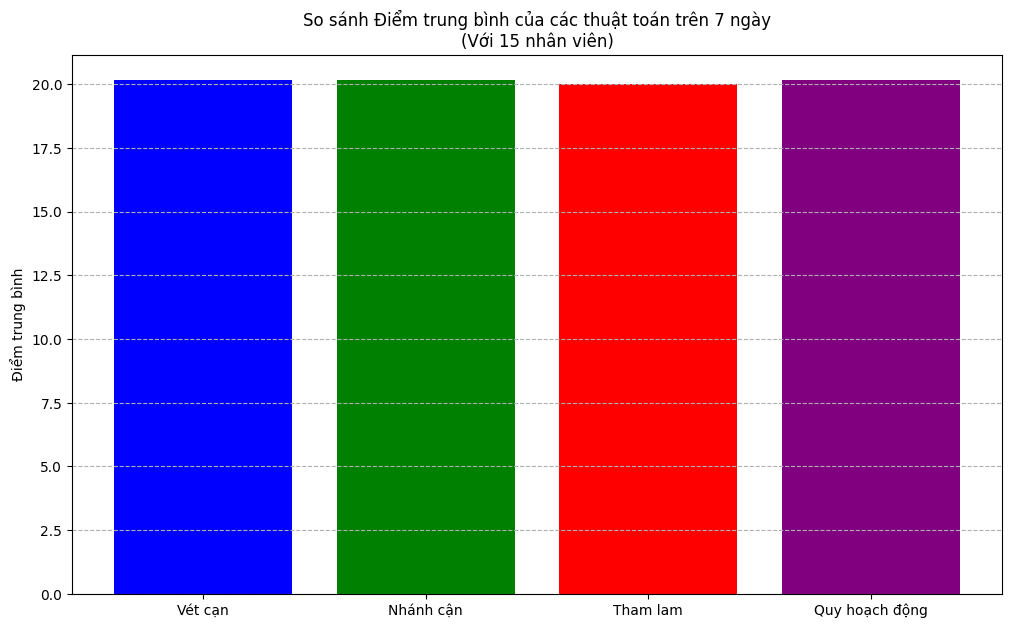

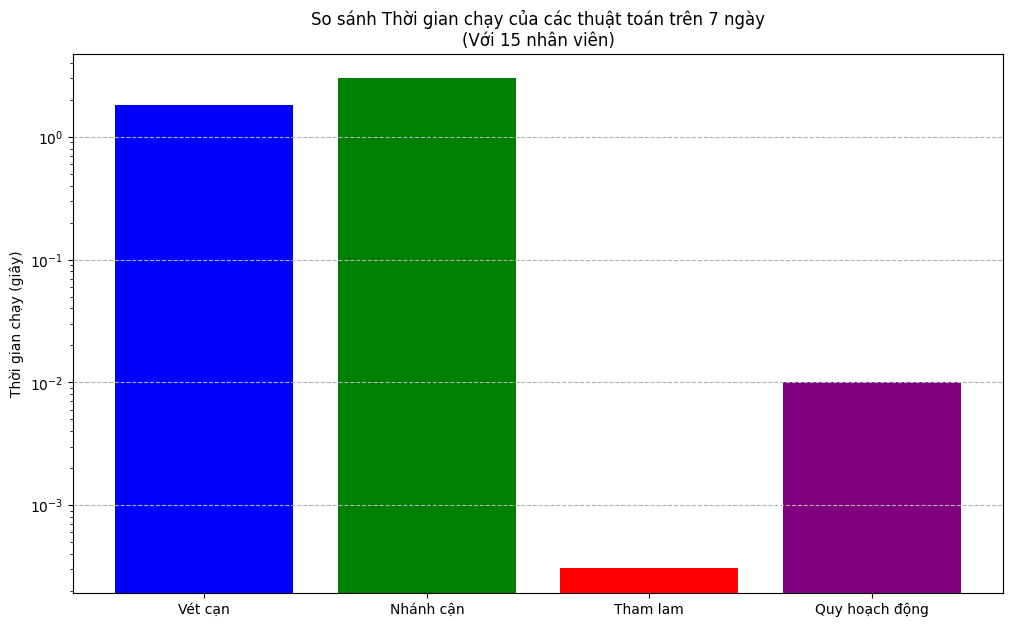

In [ ]:
# --- Cấu hình thử nghiệm với file Excel ---
file_path = 'data/nhanvien_schedule.xlsx'

# Đọc dữ liệu từ file Excel
try:
    df_actual_data = pd.read_excel(file_path)
    print(f"Đã đọc file '{file_path}' thành công. Số lượng nhân viên: {len(df_actual_data)}")
except FileNotFoundError:
    print(f"Lỗi: Không tìm thấy file '{file_path}'. Vui lòng tải file lên Colab.")
    exit() # Thoát nếu không tìm thấy file

# Lấy tất cả các cột ngày có trong DataFrame
# Đảm bảo các cột ngày của bạn có tên tương ứng trong file Excel
all_day_columns = [col for col in df_actual_data.columns if col.startswith('Day') or col in ['T2', 'T3', 'T4', 'T5', 'T6', 'T7', 'CN']]
if not all_day_columns:
    print("Không tìm thấy cột ngày nào trong DataFrame. Vui lòng kiểm tra lại cấu trúc file.")
    print("Cần có các cột như 'Day 1', 'Day 2', hoặc 'T2', 'T3', ...")
    exit()

# Chọn 7 ngày đầu tiên để so sánh điểm trung bình
# Nếu file của bạn có ít hơn 7 ngày, nó sẽ dùng tất cả các ngày có sẵn.
days_for_average_score = all_day_columns[:min(7, len(all_day_columns))]
num_days_in_test = len(days_for_average_score)

if num_days_in_test == 0:
    print("Không có ngày nào để tính điểm trung bình. Vui lòng kiểm tra file Excel.")
    exit()

print(f"\nBắt đầu chạy thuật toán để so sánh thời gian và điểm trung bình trên {num_days_in_test} ngày...")

# Thực hiện đo lường
time_bf, score_bf = run_brute_force_algo(df_actual_data, days_for_average_score)
time_bnb, score_bnb = run_branch_and_bound_algo(df_actual_data, days_for_average_score)
time_greedy, score_greedy = run_greedy_algo(df_actual_data, days_for_average_score)
time_dp, score_dp = run_dynamic_programming_algo(df_actual_data, days_for_average_score)

# Tính điểm trung bình
avg_score_bf = score_bf / num_days_in_test
avg_score_bnb = score_bnb / num_days_in_test
avg_score_greedy = score_greedy / num_days_in_test
avg_score_dp = score_dp / num_days_in_test

print("\n--- Kết quả đo lường ---")
print(f"Vét cạn: Thời gian = {time_bf:.4f} giây, Điểm trung bình = {avg_score_bf:.2f}")
print(f"Nhánh cận: Thời gian = {time_bnb:.4f} giây, Điểm trung bình = {avg_score_bnb:.2f}")
print(f"Tham lam: Thời gian = {time_greedy:.4f} giây, Điểm trung bình = {avg_score_greedy:.2f}")
print(f"Quy hoạch động: Thời gian = {time_dp:.4f} giây, Điểm trung bình = {avg_score_dp:.2f}")

# --- Vẽ biểu đồ so sánh Score ---
algorithm_names = ['Vét cạn', 'Nhánh cận', 'Tham lam', 'Quy hoạch động']
avg_scores = [avg_score_bf, avg_score_bnb, avg_score_greedy, avg_score_dp]

plt.figure(figsize=(12, 7))
plt.bar(algorithm_names, avg_scores, color=['blue', 'green', 'red', 'purple'])
plt.ylabel("Điểm trung bình")
plt.title(f"So sánh Điểm trung bình của các thuật toán trên {num_days_in_test} ngày\n(Với {len(df_actual_data)} nhân viên)")
plt.grid(axis='y', linestyle='--')
plt.show()

# --- Vẽ biểu đồ so sánh Thời gian chạy ---
run_times = [time_bf, time_bnb, time_greedy, time_dp]

plt.figure(figsize=(12, 7))
plt.bar(algorithm_names, run_times, color=['blue', 'green', 'red', 'purple'])
plt.ylabel("Thời gian chạy (giây)")
plt.title(f"So sánh Thời gian chạy của các thuật toán trên {num_days_in_test} ngày\n(Với {len(df_actual_data)} nhân viên)")
plt.grid(axis='y', linestyle='--')
plt.yscale('log') # Thang đo log thường phù hợp cho thời gian
plt.show()